In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import absolute, mean, std
import lightgbm as lgbm
from catboost import CatBoostRegressor

In [3]:
gdf = gpd.read_file('D:/İndirilenler/Haluk_Gül/GEDAŞ/emsal_cbs.gpkg')
gdf

OBJECTID                              globalid    projealani        il  \
0           42  EF2369A9-E0F2-4B46-BA44-F00B8859EC15    bakirkoy_3  ISTANBUL   
1           43  1B847170-2FE0-4CA1-8658-D27F5F9FDDCA    bakirkoy_3  ISTANBUL   
2           44  933FADE2-FBF4-403C-81DF-9F4478E68BA4    bakirkoy_3  ISTANBUL   
3           45  8FFE2BC2-499F-46A0-80AE-914ED37C188B    bakirkoy_2  ISTANBUL   
4           46  AB87CBB6-D04D-401C-A652-12FB1CAAEB70    bakirkoy_2  ISTANBUL   
...        ...                                   ...           ...       ...   
2752      3131  AFFD60A3-88E1-41B6-BB66-A9F59F4D722E    besiktas_7  ISTANBUL   
2753      3132  12B915C0-F2EB-4C0E-985B-872EC0CBD560    besiktas_7  ISTANBUL   
2754      3133  1E062EC6-C5EE-4910-AF34-7271BD17112D  buyukcekmece  ISTANBUL   
2755      3134  2F978B2A-4271-40B6-A56C-1C2DDB317087  buyukcekmece  ISTANBUL   
2756      3135  38DA5BDC-65A6-4E22-ACF9-C85650853935  buyukcekmece  ISTANBUL   

              ilce        mahalle   zeminid  adano  parselno   site  ...  \
0         BAKIRKOY       UMRANIYE  20103799  626.0        10  hayir  ...   
1         BAKIRKOY       UMRANIYE  20103799  626.0        10  hayir  ...   
2         BAKIRKOY       UMRANIYE  20110245  626.0        12  hayir  ...   
3         BAKIRKOY         SENLIK  20105772  569.0        35  hayir  ...   
4         BAKIRKOY         SENLIK  20102704  727.0        44  hayir  ...   
...            ...            ...       ...    ...       ...    ...  ...   
2752      BESIKTAS  RUMELI HISARI  24620374    NaN       133   evet  ...   
2753      BESIKTAS  RUMELI HISARI  24625396    NaN        69  hayir  ...   
2754  BUYUKCEKMECE        TURKOBA  20330996    NaN        11   evet  ...   
2755  BUYUKCEKMECE        TURKOBA  20330972    NaN         1   evet  ...   
2756  BUYUKCEKMECE        TURKOBA  20330989    NaN         6   evet  ...   

     rayli saglik sehirmerke  egim  sokak  tarihi universite  yesilalan  \
0     20.0   10.0       10.0  20.0   90.0     0.0       10.0       90.0   
1     20.0   10.0       10.0  20.0   90.0     0.0       10.0       90.0   
2     20.0   10.0       10.0  10.0   80.0     0.0       10.0       90.0   
3     20.0   20.0       10.0   0.0   80.0     0.0       20.0       70.0   
4     20.0   20.0       10.0   0.0   90.0     0.0       20.0       70.0   
...    ...    ...        ...   ...    ...     ...        ...        ...   
2752  90.0   90.0       10.0   0.0   70.0    20.0       70.0      100.0   
2753  90.0   90.0       10.0   0.0  100.0    20.0       60.0      100.0   
2754   0.0   10.0        0.0  10.0   60.0     0.0       40.0      100.0   
2755   0.0    0.0        0.0  10.0   60.0     0.0       40.0      100.0   
2756   0.0   10.0        0.0  85.0   50.0     0.0       40.0       90.0   

      zararliala                        geometry  
0            0.0  POINT (400390.936 4536663.344)  
1            0.0  POINT (400390.936 4536663.344)  
2            0.0  POINT (400378.839 4536709.049)  
3           10.0  POINT (399059.902 4537750.273)  
4           10.0  POINT (399147.553 4537781.283)  
...          ...                             ...  
2752        10.0  POINT (419012.879 4550238.364)  
2753        10.0  POINT (418901.644 4550066.990)  
2754        90.0  POINT (374072.825 4546942.700)  
2755        90.0  POINT (374564.745 4548333.927)  
2756        90.0  POINT (373533.784 4547068.290)  

[2757 rows x 106 columns]

In [35]:
gdf.isnull().sum()

OBJECTID                  0
globalid                  0
il                        0
ilce                      0
mahalle                 320
                       ... 
binayas_label             0
bbkatsayisi_label         0
bbtur_label               0
bbagirlikliyon_label      0
tip_label                 0
Length: 76, dtype: int64

In [22]:
(gdf == 0).sum()

OBJECTID         0
globalid         0
projealani       0
il               0
ilce             0
              ... 
tarihi        1541
universite     218
yesilalan        0
zararliala     812
geometry         0
Length: 106, dtype: int64

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Columns: 106 entries, OBJECTID to geometry
dtypes: float64(58), geometry(1), int64(9), object(38)
memory usage: 2.2+ MB


In [3]:
#null değerleri impute et
gdf['site'] = gdf['site'].fillna(0)
gdf['guvenlik'] = gdf['guvenlik'].fillna(0)
gdf['donati'] = gdf['donati'].fillna(0)
gdf['otopark'] = gdf['otopark'].fillna("yok")
gdf['binayas'] = gdf['binayas'].fillna("0_5")
gdf['yapikatsayisi'] = gdf['yapikatsayisi'].fillna("0")
gdf['bbkatsayisi'] = gdf['bbkatsayisi'].fillna("0")
gdf['tekkatm2'] = gdf['tekkatm2'].fillna("0")
gdf['bodrum2katim2'] = gdf['bodrum2katim2'].fillna("0")
gdf['bodrum1katim2'] = gdf['bodrum1katim2'].fillna("0")
gdf['zeminkatm2'] = gdf['zeminkatm2'].fillna("0")
gdf['asmakatm2'] = gdf['asmakatm2'].fillna("0")
gdf['normal1katim2'] = gdf['normal1katim2'].fillna("0")
gdf['normal2katim2'] = gdf['normal2katim2'].fillna("0")
gdf['normal3katim2'] = gdf['normal3katim2'].fillna("0")
gdf['catikatim2'] = gdf['catikatim2'].fillna("0")
gdf['terasalanim2'] = gdf['terasalanim2'].fillna("0")
gdf['odasayisi'] = gdf['odasayisi'].fillna("0")
gdf['salonsayisi'] = gdf['salonsayisi'].fillna("0")
gdf['banyosayisi'] = gdf['banyosayisi'].fillna("0")
gdf['mutfaksayisi'] = gdf['mutfaksayisi'].fillna("0")
gdf['bbcephesayisi'] = gdf['bbcephesayisi'].fillna("0")
gdf['mimariproj'] = gdf['mimariproj'].fillna("Mimari Proje Yok")
gdf['tip'] = gdf['tip'].fillna("Kat Mulkiyeti/Kat Ä°rtifakÄ±")
gdf['bbistfiyat'] = gdf['bbistfiyat'].fillna("0")
gdf['bbistkira'] = gdf['bbistkira'].fillna("0")
gdf['bbpazfiyat'] = gdf['bbpazfiyat'].fillna("0")
gdf['bbpazkira'] = gdf['bbpazkira'].fillna("0")
gdf['bbtur'] = gdf['bbtur'].fillna("other")
gdf['bbagirlikliyon'] = gdf['bbagirlikliyon'].fillna("yonbelirtilmemis")

In [4]:
gdf = gdf.drop(['bbyon','bbtur_other','bbmanzara','bbmanzara_other','bbkonum','projealani','bbemsalaciklama','emsalkaynak','emsalkaynak_other', 'websitesilinki', 'beyankisi', 'kisiiletisim', 'uniqueid', 'emsalbagimsiziliski', 'id_object', 'ilad', 'ilcead', 'mahallead', 'adano_2', 'parselno_2', 'PROJEBOLGE', 'ALTBOLGE', 'ParselID', 'ZeminID_2', 'MahalleID', 'IlceID', 'BANT', 'KatCK_HDC', 'KatNK_HDC', 'KatAK_HDC', 'KatZK_HDC', 'KatBK_HDC', 'Shape_Leng', 'Shape_Area', 'Referans5', 'konutbbsay'], axis=1)
gdf

OBJECTID                              globalid        il          ilce  \
0           42  EF2369A9-E0F2-4B46-BA44-F00B8859EC15  ISTANBUL      BAKIRKOY   
1           43  1B847170-2FE0-4CA1-8658-D27F5F9FDDCA  ISTANBUL      BAKIRKOY   
2           44  933FADE2-FBF4-403C-81DF-9F4478E68BA4  ISTANBUL      BAKIRKOY   
3           45  8FFE2BC2-499F-46A0-80AE-914ED37C188B  ISTANBUL      BAKIRKOY   
4           46  AB87CBB6-D04D-401C-A652-12FB1CAAEB70  ISTANBUL      BAKIRKOY   
...        ...                                   ...       ...           ...   
2752      3131  AFFD60A3-88E1-41B6-BB66-A9F59F4D722E  ISTANBUL      BESIKTAS   
2753      3132  12B915C0-F2EB-4C0E-985B-872EC0CBD560  ISTANBUL      BESIKTAS   
2754      3133  1E062EC6-C5EE-4910-AF34-7271BD17112D  ISTANBUL  BUYUKCEKMECE   
2755      3134  2F978B2A-4271-40B6-A56C-1C2DDB317087  ISTANBUL  BUYUKCEKMECE   
2756      3135  38DA5BDC-65A6-4E22-ACF9-C85650853935  ISTANBUL  BUYUKCEKMECE   

            mahalle   zeminid  adano  parselno   site guvenlik  ... rayli  \
0          UMRANIYE  20103799  626.0        10  hayir      yok  ...  20.0   
1          UMRANIYE  20103799  626.0        10  hayir      yok  ...  20.0   
2          UMRANIYE  20110245  626.0        12  hayir      yok  ...  20.0   
3            SENLIK  20105772  569.0        35  hayir      yok  ...  20.0   
4            SENLIK  20102704  727.0        44  hayir      var  ...  20.0   
...             ...       ...    ...       ...    ...      ...  ...   ...   
2752  RUMELI HISARI  24620374    NaN       133   evet      var  ...  90.0   
2753  RUMELI HISARI  24625396    NaN        69  hayir      yok  ...  90.0   
2754        TURKOBA  20330996    NaN        11   evet      yok  ...   0.0   
2755        TURKOBA  20330972    NaN         1   evet      yok  ...   0.0   
2756        TURKOBA  20330989    NaN         6   evet      yok  ...   0.0   

     saglik sehirmerke  egim  sokak tarihi universite yesilalan zararliala  \
0      10.0       10.0  20.0   90.0    0.0       10.0      90.0        0.0   
1      10.0       10.0  20.0   90.0    0.0       10.0      90.0        0.0   
2      10.0       10.0  10.0   80.0    0.0       10.0      90.0        0.0   
3      20.0       10.0   0.0   80.0    0.0       20.0      70.0       10.0   
4      20.0       10.0   0.0   90.0    0.0       20.0      70.0       10.0   
...     ...        ...   ...    ...    ...        ...       ...        ...   
2752   90.0       10.0   0.0   70.0   20.0       70.0     100.0       10.0   
2753   90.0       10.0   0.0  100.0   20.0       60.0     100.0       10.0   
2754   10.0        0.0  10.0   60.0    0.0       40.0     100.0       90.0   
2755    0.0        0.0  10.0   60.0    0.0       40.0     100.0       90.0   
2756   10.0        0.0  85.0   50.0    0.0       40.0      90.0       90.0   

                            geometry  
0     POINT (400390.936 4536663.344)  
1     POINT (400390.936 4536663.344)  
2     POINT (400378.839 4536709.049)  
3     POINT (399059.902 4537750.273)  
4     POINT (399147.553 4537781.283)  
...                              ...  
2752  POINT (419012.879 4550238.364)  
2753  POINT (418901.644 4550066.990)  
2754  POINT (374072.825 4546942.700)  
2755  POINT (374564.745 4548333.927)  
2756  POINT (373533.784 4547068.290)  

[2757 rows x 70 columns]

In [5]:
#site "evet" olanları "1", "hayir" olanları "0" yap.
gdf['site'] = gdf['site'].replace('evet','1')
gdf['site'] = gdf['site'].replace('hayir','0')
gdf['site'] = gdf['site'].astype(np.int64)

In [6]:
gdf['guvenlik'] = gdf['guvenlik'].replace('var','1')
gdf['guvenlik'] = gdf['guvenlik'].replace('yok','0')
gdf['guvenlik'] = gdf['guvenlik'].astype(np.int64)
gdf['donati'] = gdf['donati'].replace('var','1')
gdf['donati'] = gdf['donati'].replace('yok','0')
gdf['donati'] = gdf['donati'].astype(np.int64)
gdf['mimariproj'] = gdf['mimariproj'].replace('Mimari Proje Var','1')
gdf['mimariproj'] = gdf['mimariproj'].replace('Mimari Proje Yok','0')
gdf['mimariproj'] = gdf['mimariproj'].astype(np.int64)

In [7]:
gdf['yapikatsayisi'] = gdf['yapikatsayisi'].astype(np.int64)
gdf['odasayisi'] = gdf['odasayisi'].astype(np.int64)
gdf['odasayisi'] = gdf['odasayisi'].astype(np.int64)
gdf['salonsayisi'] = gdf['salonsayisi'].astype(np.int64)
gdf['banyosayisi'] = gdf['banyosayisi'].astype(np.int64)
gdf['mutfaksayisi'] = gdf['mutfaksayisi'].astype(np.int64)
gdf['bbcephesayisi'] = gdf['bbcephesayisi'].astype(np.int64)
gdf['bbistfiyat'] = gdf['bbistfiyat'].astype(np.int64)
gdf['bbistkira'] = gdf['bbistkira'].astype(np.int64)
gdf['bbpazfiyat'] = gdf['bbpazfiyat'].astype(np.int64)
gdf['bbpazkira'] = gdf['bbpazkira'].astype(np.int64)
gdf['tekkatm2'] = gdf['tekkatm2'].astype(np.int64)
gdf['bodrum2katim2'] = gdf['bodrum2katim2'].astype(np.int64)
gdf['bodrum1katim2'] = gdf['bodrum1katim2'].astype(np.int64)
gdf['zeminkatm2'] = gdf['zeminkatm2'].astype(np.int64)
gdf['asmakatm2'] = gdf['asmakatm2'].astype(np.int64)
gdf['normal1katim2'] = gdf['normal1katim2'].astype(np.int64)
gdf['normal2katim2'] = gdf['normal2katim2'].astype(np.int64)
gdf['normal3katim2'] = gdf['normal3katim2'].astype(np.int64)
gdf['catikatim2'] = gdf['catikatim2'].astype(np.int64)
gdf['terasalanim2'] = gdf['terasalanim2'].astype(np.int64)

In [8]:
#yapikatsayisi 300 olanları dropla
gdf.drop(gdf[(gdf.yapikatsayisi == 300)].index, inplace=True)
#katsayisi -1 olanları 1 yap
gdf['yapikatsayisi'] = gdf['yapikatsayisi'].replace(-1,1)
gdf['yapikatsayisi'] = gdf['yapikatsayisi'].replace(-2,2)

In [17]:
from collections import Counter
Counter(gdf.bbtur)

Counter({'mesken': 961,
         'dubleskmesken': 158,
         None: 728,
         'villa': 586,
         'rezidans': 248,
         'other': 25,
         'catiaralimesken': 50})

In [16]:
gdf.bbistfiyat.isnull().sum()

0

<AxesSubplot:>

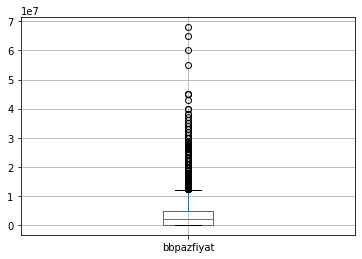

In [9]:
gdf.boxplot(column='bbpazfiyat')

<AxesSubplot:>

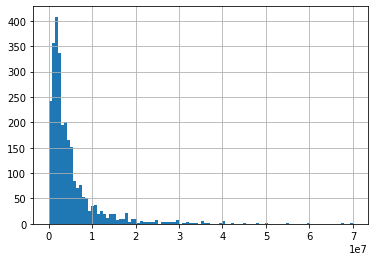

In [13]:
gdf['bbistfiyat'].hist(bins = 100)

<AxesSubplot:xlabel='bbistfiyat', ylabel='bbistfiyat'>

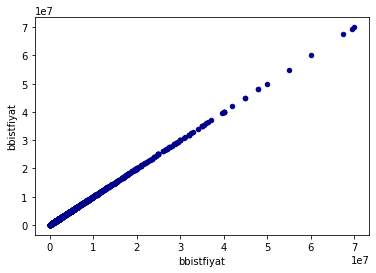

In [17]:
gdf.plot.scatter(x='bbistfiyat', y='bbistfiyat', c='DarkBlue')

In [9]:
#gdf.drop(gdf[gdf.price_paid >= 360000000].index, inplace=True)

C:\Users\METE\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='price_paid', ylabel='area'>

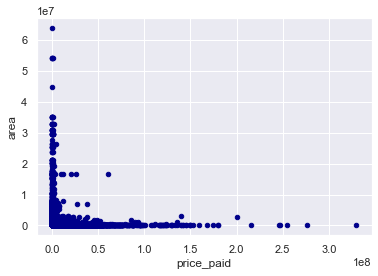

In [47]:
#gdf.plot.scatter(x='price_paid', y='area', c='DarkBlue')

In [9]:
numerical_data = gdf.select_dtypes(include=['number'])
numerical_data = numerical_data.drop(['OBJECTID','zeminid','adano','parselno'], axis=1)
categorical_data = gdf.select_dtypes(include=['object'])
categorical_data = categorical_data.drop(['globalid','il','ilce','mahalle','blokno','bbno','nitelik'], axis=1)

['site' 'guvenlik' 'donati' 'yapikatsayisi' 'tekkatm2' 'bodrum2katim2'
 'bodrum1katim2' 'zeminkatm2' 'asmakatm2' 'normal1katim2' 'normal2katim2'
 'normal3katim2' 'catikatim2' 'terasalanim2' 'odasayisi' 'salonsayisi'
 'banyosayisi' 'mutfaksayisi' 'bbcephesayisi' 'bbistfiyat' 'bbpazfiyat'
 'bbistkira' 'bbpazkira' 'yuzolcum' 'mimariproj' 'x' 'y' 'bogaz' 'deniz'
 'gol' 'baki' 'avm' 'yol_e5' 'egitim' 'hastane' 'havalimani' 'iskele'
 'itfaiye' 'karakol' 'kavsak' 'metrobus' 'otobus' 'otopark_2' 'rayli'
 'saglik' 'sehirmerke' 'egim' 'sokak' 'tarihi' 'universite' 'yesilalan'
 'zararliala']
52


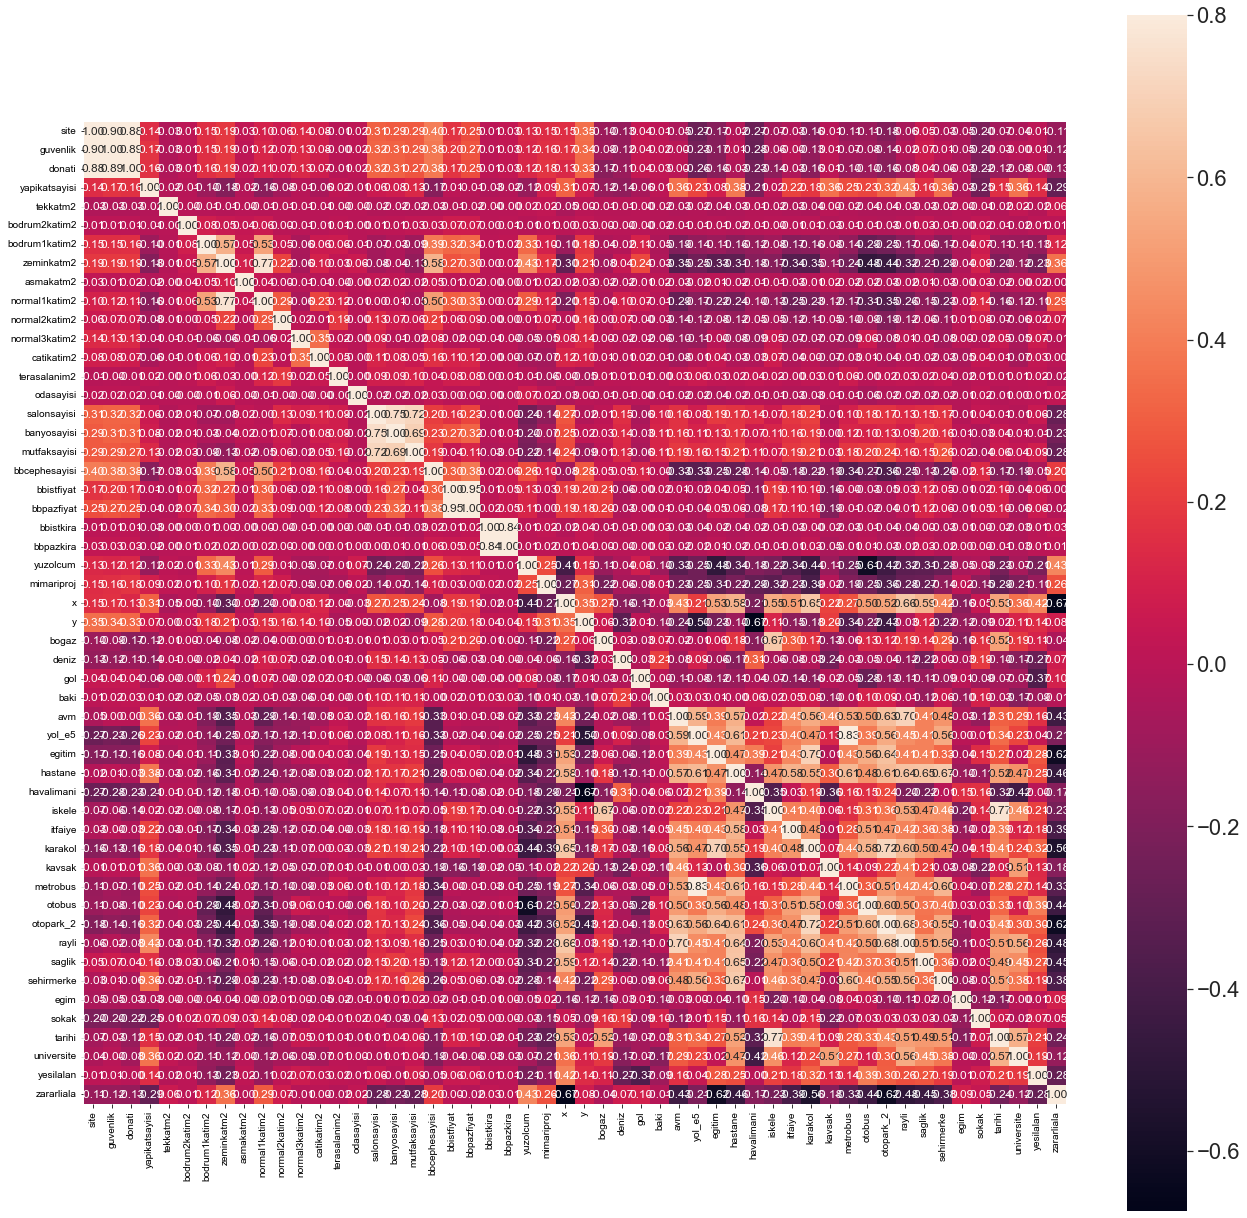

In [10]:
print(numerical_data.columns.values)
print(len(numerical_data.columns.values))

corrmat = numerical_data.corr()
fig, ax = plt.subplots(figsize=(22, 22))
sns.set(font_scale=2)
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, annot_kws={'size': 12}, fmt='.2f')
plt.show()

['bbistfiyat' 'bbpazfiyat' 'bodrum1katim2' 'normal1katim2' 'bbcephesayisi'
 'banyosayisi' 'zeminkatm2' 'bogaz' 'y' 'guvenlik']


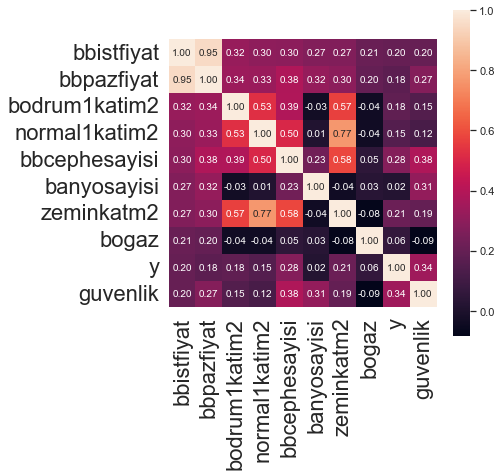

In [11]:
n = 10
most_largest_features = corrmat.nlargest(n, 'bbistfiyat')['bbistfiyat'].index
zoomed_corrmat = np.corrcoef(numerical_data[most_largest_features].values.T)
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1)
sns.heatmap(zoomed_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)

C:\Users\METE\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


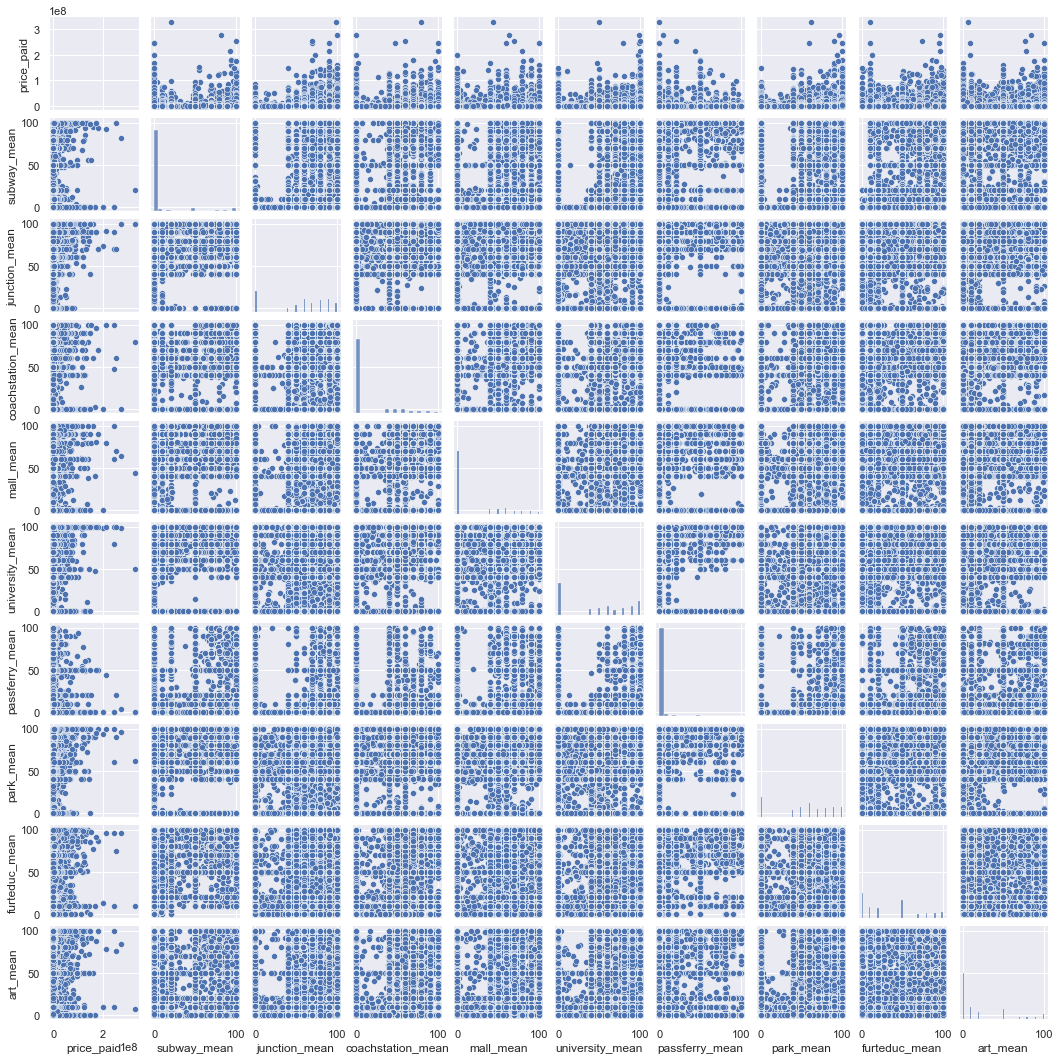

Index(['price_paid', 'subway_mean', 'junction_mean', 'coachstation_mean',
       'mall_mean', 'university_mean', 'passferry_mean', 'park_mean',
       'furteduc_mean', 'art_mean'],
      dtype='object')


In [33]:
sns.set()
most_largest_features = corrmat.nlargest(10, 'price_paid')['price_paid'].index
sns.pairplot(numerical_data[most_largest_features.values], size=1.5)
plt.show()
print(most_largest_features)

In [12]:
corr_with_price = numerical_data.corr()
corr_with_price = corr_with_price.sort_values(by= 'bbistfiyat', ascending=False)
corr_with_price['bbistfiyat']

bbistfiyat       1.000000
bbpazfiyat       0.951798
bodrum1katim2    0.324386
normal1katim2    0.303296
bbcephesayisi    0.299908
banyosayisi      0.271782
zeminkatm2       0.267057
bogaz            0.207205
y                0.199713
guvenlik         0.198490
iskele           0.190378
x                0.189061
donati           0.172913
site             0.172036
salonsayisi      0.156168
yuzolcum         0.129184
saglik           0.121622
itfaiye          0.114866
catikatim2       0.105067
karakol          0.104966
tarihi           0.103902
terasalanim2     0.077314
bodrum2katim2    0.070118
normal2katim2    0.063740
yesilalan        0.056273
hastane          0.053845
sehirmerke       0.046754
bbpazkira        0.046128
egitim           0.044309
mutfaksayisi     0.042771
mimariproj       0.027419
rayli            0.027066
sokak            0.021844
baki             0.021048
yapikatsayisi    0.011266
asmakatm2        0.011179
bbistkira        0.011010
avm              0.008944
odasayisi   

In [13]:
list(categorical_data.columns)

['otopark', 'binayas', 'bbkatsayisi', 'bbtur', 'bbagirlikliyon', 'tip']

In [25]:
from collections import Counter
Counter(gdf.nitelik)

Counter({'ARSA': 387,
         'ONBES BAGIMSIZ BÃ–LÃœMLÃœ KARGIR APARTMAN': 1,
         '3KATLI MESKEN OLAN BETONARME BINA VE ARSASI': 1,
         'TARLA': 50,
         'BAHÃ‡ELI AHSAP EV': 12,
         'A,B,C VE D BLOKLARDAN OLUSAN 4 KATLI 4 ADET BETONARME MESKEN VE ARSASI': 2,
         '1 BODRUM + ZEMIN KAT + 1 NORMAL KATLI, 8 BLOKLU DUBLEKS KONUT VE BAHÃ‡ESI': 4,
         "3'er Katli 9 Bloklu Betonarme Mesken ve Arsasi": 5,
         '4 Katli Betonarme Mesken ve Arsasi': 4,
         'A,B,C,BLOKLARINDAN OLUSAN DÃ–RT KATLI BETONARME  MESKEN VE ARSASI': 1,
         '2 bodrum+zemin+1 Normal Katli Bina ve ARSASI': 1,
         '6 KATLI KARGIR BINA': 1,
         '2 BODRUM 1 ZEMIN 1 NORMAL KATLI Ã‡ATI ARASI PIYESLI KARGIR BINA VE ARSASI': 1,
         'IKI KAT DÃ–RT MESKENLI KARGIR APARTMAN': 1,
         '6 KATLI BETONARME MESKEN VE ARSASI': 16,
         'arsa': 7,
         '6 KATLI MESKEN OLAN BETONARME BINA VE ARSASI': 4,
         'BAG YERI': 1,
         '2 BODRUM+1 ZEMIN+3 NORMAL KATLI Ã‡A

In [9]:
#First apply LabelEncoder convert string to integer for categorical data
otopark_le = LabelEncoder()
otopark_labels = otopark_le.fit_transform(gdf['otopark'])
gdf['otopark_label'] = otopark_labels

binayas_le = LabelEncoder()
binayas_labels = binayas_le.fit_transform(gdf['binayas'])
gdf['binayas_label'] = binayas_labels

bbkatsayisi_le = LabelEncoder()
bbkatsayisi_labels = bbkatsayisi_le.fit_transform(gdf['bbkatsayisi'])
gdf['bbkatsayisi_label'] = bbkatsayisi_labels

bbtur_le = LabelEncoder()
bbtur_labels = bbtur_le.fit_transform(gdf['bbtur'])
gdf['bbtur_label'] = bbtur_labels

bbagirlikliyon_le = LabelEncoder()
bbagirlikliyon_labels = bbagirlikliyon_le.fit_transform(gdf['bbagirlikliyon'])
gdf['bbagirlikliyon_label'] = bbagirlikliyon_labels

tip_le = LabelEncoder()
tip_labels = tip_le.fit_transform(gdf['tip'])
gdf['tip_label'] = tip_labels

In [10]:
# now encode labels using one-hot encoding scheme for nominal categorical data
otopark_ohe = OneHotEncoder()
otopark_feature_arr = otopark_ohe.fit_transform(
                              gdf[['otopark_label']]).toarray()
otopark_feature_labels = ['otopark_'+str(cls_label) 
                           for cls_label in otopark_le.classes_]
otopark_features = pd.DataFrame(otopark_feature_arr, 
                            columns=otopark_feature_labels)

binayas_ohe = OneHotEncoder()
binayas_feature_arr = binayas_ohe.fit_transform(
                              gdf[['binayas_label']]).toarray()
binayas_feature_labels = ['binayas_'+str(cls_label) 
                           for cls_label in binayas_le.classes_]
binayas_features = pd.DataFrame(binayas_feature_arr, 
                            columns=binayas_feature_labels)

bbkatsayisi_ohe = OneHotEncoder()
bbkatsayisi_feature_arr = bbkatsayisi_ohe.fit_transform(
                              gdf[['bbkatsayisi_label']]).toarray()
bbkatsayisi_feature_labels = ['bbkatsayisi_'+str(cls_label) 
                           for cls_label in bbkatsayisi_le.classes_]
bbkatsayisi_features = pd.DataFrame(bbkatsayisi_feature_arr, 
                            columns=bbkatsayisi_feature_labels)

bbtur_ohe = OneHotEncoder()
bbtur_feature_arr = bbtur_ohe.fit_transform(
                              gdf[['bbtur_label']]).toarray()
bbtur_feature_labels = ['bbtur_'+str(cls_label) 
                           for cls_label in bbtur_le.classes_]
bbtur_features = pd.DataFrame(bbtur_feature_arr, 
                            columns=bbtur_feature_labels)

bbagirlikliyon_ohe = OneHotEncoder()
bbagirlikliyon_feature_arr = bbagirlikliyon_ohe.fit_transform(
                              gdf[['bbagirlikliyon_label']]).toarray()
bbagirlikliyon_feature_labels = ['bbagirlikliyon_'+str(cls_label) 
                           for cls_label in bbagirlikliyon_le.classes_]
bbagirlikliyon_features = pd.DataFrame(bbagirlikliyon_feature_arr, 
                            columns=bbagirlikliyon_feature_labels)

tip_ohe = OneHotEncoder()
tip_feature_arr = tip_ohe.fit_transform(
                              gdf[['tip_label']]).toarray()
tip_feature_labels = ['tip_'+str(cls_label) 
                           for cls_label in tip_le.classes_]
tip_features = pd.DataFrame(tip_feature_arr, 
                            columns=tip_feature_labels)

In [11]:
gdf_labels = list(gdf.columns)
gdf_ohe = pd.concat([gdf, otopark_features, binayas_features, bbkatsayisi_features, bbtur_features, bbagirlikliyon_features, tip_features], axis=1)
columns = sum([gdf_labels, otopark_feature_labels, binayas_feature_labels, bbkatsayisi_feature_labels, bbtur_feature_labels, bbagirlikliyon_feature_labels, tip_feature_labels], [])
gdf_ohe

OBJECTID                              globalid        il          ilce  \
0         42.0  EF2369A9-E0F2-4B46-BA44-F00B8859EC15  ISTANBUL      BAKIRKOY   
1         43.0  1B847170-2FE0-4CA1-8658-D27F5F9FDDCA  ISTANBUL      BAKIRKOY   
2         44.0  933FADE2-FBF4-403C-81DF-9F4478E68BA4  ISTANBUL      BAKIRKOY   
3         45.0  8FFE2BC2-499F-46A0-80AE-914ED37C188B  ISTANBUL      BAKIRKOY   
4         46.0  AB87CBB6-D04D-401C-A652-12FB1CAAEB70  ISTANBUL      BAKIRKOY   
...        ...                                   ...       ...           ...   
2752    3131.0  AFFD60A3-88E1-41B6-BB66-A9F59F4D722E  ISTANBUL      BESIKTAS   
2753    3132.0  12B915C0-F2EB-4C0E-985B-872EC0CBD560  ISTANBUL      BESIKTAS   
2754    3133.0  1E062EC6-C5EE-4910-AF34-7271BD17112D  ISTANBUL  BUYUKCEKMECE   
2755    3134.0  2F978B2A-4271-40B6-A56C-1C2DDB317087  ISTANBUL  BUYUKCEKMECE   
2756    3135.0  38DA5BDC-65A6-4E22-ACF9-C85650853935  ISTANBUL  BUYUKCEKMECE   

            mahalle     zeminid  adano  parselno  site  guvenlik  ...  \
0          UMRANIYE  20103799.0  626.0      10.0   0.0       0.0  ...   
1          UMRANIYE  20103799.0  626.0      10.0   0.0       0.0  ...   
2          UMRANIYE  20110245.0  626.0      12.0   0.0       0.0  ...   
3            SENLIK  20105772.0  569.0      35.0   0.0       0.0  ...   
4            SENLIK  20102704.0  727.0      44.0   0.0       1.0  ...   
...             ...         ...    ...       ...   ...       ...  ...   
2752  RUMELI HISARI  24620374.0    NaN     133.0   1.0       1.0  ...   
2753  RUMELI HISARI  24625396.0    NaN      69.0   0.0       0.0  ...   
2754        TURKOBA  20330996.0    NaN      11.0   1.0       0.0  ...   
2755        TURKOBA  20330972.0    NaN       1.0   1.0       0.0  ...   
2756        TURKOBA  20330989.0    NaN       6.0   1.0       0.0  ...   

      bbagirlikliyon_dogu bbagirlikliyon_guney bbagirlikliyon_guneybati  \
0                     0.0                  1.0                      0.0   
1                     0.0                  1.0                      0.0   
2                     0.0                  1.0                      0.0   
3                     0.0                  0.0                      0.0   
4                     0.0                  0.0                      0.0   
...                   ...                  ...                      ...   
2752                  0.0                  1.0                      0.0   
2753                  0.0                  0.0                      0.0   
2754                  1.0                  0.0                      0.0   
2755                  0.0                  1.0                      0.0   
2756                  NaN                  NaN                      NaN   

     bbagirlikliyon_guneydogu  bbagirlikliyon_kuzey bbagirlikliyon_kuzeybati  \
0                         0.0                   0.0                      0.0   
1                         0.0                   0.0                      0.0   
2                         0.0                   0.0                      0.0   
3                         0.0                   0.0                      0.0   
4                         0.0                   0.0                      0.0   
...                       ...                   ...                      ...   
2752                      0.0                   0.0                      0.0   
2753                      0.0                   0.0                      0.0   
2754                      0.0                   0.0                      0.0   
2755                      0.0                   0.0                      0.0   
2756                      NaN                   NaN                      NaN   

      bbagirlikliyon_kuzeydogu  bbagirlikliyon_yonbelirtilmemis  \
0                          0.0                              0.0   
1                          0.0                              0.0   
2                          0.0                              0.0   
3                          0.0        

In [26]:
df1 = gdf_ohe.drop(['nitelik','OBJECTID','globalid','il','ilce', 'mahalle', 'zeminid', 'adano', 'parselno', 'blokno', 'bbno', 'otopark_label', 'otopark', 'binayas_label', 'binayas', 'bbkatsayisi_label', 'bbkatsayisi', 'bbtur_label', 'bbtur', 'bbagirlikliyon_label', 'bbagirlikliyon', 'tip_label', 'tip', 'geometry'], axis=1)
df1.rename(columns={"tip_AnaTaÅŸÄ±nmaz": "tip_anatasinmaz",
                    "tip_Kat Mulkiyeti/Kat Ä°rtifakÄ±": "tip_katmulkiyetikatirtifaki"
                   }, inplace=True)
df1

site  guvenlik  donati  yapikatsayisi  tekkatm2  bodrum2katim2  \
0      0.0       0.0     0.0            0.0     120.0            0.0   
1      0.0       0.0     0.0            5.0     400.0            0.0   
2      0.0       0.0     0.0            4.0     120.0            0.0   
3      0.0       0.0     0.0            1.0     240.0            0.0   
4      0.0       1.0     1.0            0.0     300.0            0.0   
...    ...       ...     ...            ...       ...            ...   
2752   1.0       1.0     0.0            3.0     350.0            0.0   
2753   0.0       0.0     0.0            2.0     230.0            0.0   
2754   1.0       0.0     0.0            0.0     800.0            0.0   
2755   1.0       0.0     0.0            0.0     800.0            0.0   
2756   1.0       0.0     0.0            0.0     350.0            0.0   

      bodrum1katim2  zeminkatm2  asmakatm2  normal1katim2  ...  \
0               0.0         0.0        0.0            0.0  ...   
1               0.0         0.0        0.0            0.0  ...   
2               0.0         0.0        0.0            0.0  ...   
3               0.0         0.0        0.0            0.0  ...   
4               0.0         0.0        0.0            0.0  ...   
...             ...         ...        ...            ...  ...   
2752            0.0         0.0        0.0            0.0  ...   
2753            0.0         0.0        0.0            0.0  ...   
2754            0.0         0.0        0.0            0.0  ...   
2755            0.0         0.0        0.0            0.0  ...   
2756            0.0         0.0        0.0            0.0  ...   

      bbagirlikliyon_dogu  bbagirlikliyon_guney  bbagirlikliyon_guneybati  \
0                     0.0                   1.0                       0.0   
1                     0.0                   1.0                       0.0   
2                     0.0                   1.0                       0.0   
3                     0.0                   0.0                       0.0   
4                     0.0                   0.0                       0.0   
...                   ...                   ...                       ...   
2752                  0.0                   1.0                       0.0   
2753                  0.0                   0.0                       0.0   
2754                  1.0                   0.0                       0.0   
2755                  0.0                   1.0                       0.0   
2756                  NaN                   NaN                       NaN   

      bbagirlikliyon_guneydogu  bbagirlikliyon_kuzey  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   
...                        ...                   ...   
2752                       0.0                   0.0   
2753                       0.0                   0.0   
2754                       0.0                   0.0   
2755                       0.0                   0.0   
2756                       NaN                   NaN   

      bbagirlikliyon_kuzeybati  bbagirlikliyon_kuzeydogu  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
2752                       0.0                       0.0   
2753                       0.0                       0.0   
2754                       0.0                       0.0   
2755                       0.0                       0.0   
2756                       NaN                       NaN   

      bbagirlikliyon_yonbelir

In [27]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2757 entries, 0 to 2756
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   site                             2756 non-null   float64
 1   guvenlik                         2756 non-null   float64
 2   donati                           2756 non-null   float64
 3   yapikatsayisi                    2756 non-null   float64
 4   tekkatm2                         2756 non-null   float64
 5   bodrum2katim2                    2756 non-null   float64
 6   bodrum1katim2                    2756 non-null   float64
 7   zeminkatm2                       2756 non-null   float64
 8   asmakatm2                        2756 non-null   float64
 9   normal1katim2                    2756 non-null   float64
 10  normal2katim2                    2756 non-null   float64
 11  normal3katim2                    2756 non-null   float64
 12  catikatim2  

In [37]:
df1 = df1.dropna()
df1

site  guvenlik  donati  yapikatsayisi  tekkatm2  bodrum2katim2  \
0      0.0       0.0     0.0            0.0     120.0            0.0   
1      0.0       0.0     0.0            5.0     400.0            0.0   
2      0.0       0.0     0.0            4.0     120.0            0.0   
3      0.0       0.0     0.0            1.0     240.0            0.0   
4      0.0       1.0     1.0            0.0     300.0            0.0   
...    ...       ...     ...            ...       ...            ...   
2751   1.0       1.0     1.0            0.0    1007.0            0.0   
2752   1.0       1.0     0.0            3.0     350.0            0.0   
2753   0.0       0.0     0.0            2.0     230.0            0.0   
2754   1.0       0.0     0.0            0.0     800.0            0.0   
2755   1.0       0.0     0.0            0.0     800.0            0.0   

      bodrum1katim2  zeminkatm2  asmakatm2  normal1katim2  ...  \
0               0.0         0.0        0.0            0.0  ...   
1               0.0         0.0        0.0            0.0  ...   
2               0.0         0.0        0.0            0.0  ...   
3               0.0         0.0        0.0            0.0  ...   
4               0.0         0.0        0.0            0.0  ...   
...             ...         ...        ...            ...  ...   
2751            0.0         0.0        0.0            0.0  ...   
2752            0.0         0.0        0.0            0.0  ...   
2753            0.0         0.0        0.0            0.0  ...   
2754            0.0         0.0        0.0            0.0  ...   
2755            0.0         0.0        0.0            0.0  ...   

      bbagirlikliyon_dogu  bbagirlikliyon_guney  bbagirlikliyon_guneybati  \
0                     0.0                   1.0                       0.0   
1                     0.0                   1.0                       0.0   
2                     0.0                   1.0                       0.0   
3                     0.0                   0.0                       0.0   
4                     0.0                   0.0                       0.0   
...                   ...                   ...                       ...   
2751                  0.0                   1.0                       0.0   
2752                  0.0                   1.0                       0.0   
2753                  0.0                   0.0                       0.0   
2754                  1.0                   0.0                       0.0   
2755                  0.0                   1.0                       0.0   

      bbagirlikliyon_guneydogu  bbagirlikliyon_kuzey  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   
...                        ...                   ...   
2751                       0.0                   0.0   
2752                       0.0                   0.0   
2753                       0.0                   0.0   
2754                       0.0                   0.0   
2755                       0.0                   0.0   

      bbagirlikliyon_kuzeybati  bbagirlikliyon_kuzeydogu  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
2751                       0.0                       0.0   
2752                       0.0                       0.0   
2753                       0.0                       0.0   
2754                       0.0                       0.0   
2755                       0.0                       0.0   

      bbagirlikliyon_yonbelir

In [38]:
X = df1.drop(['bbistfiyat','bbpazfiyat'], axis=1)
y = df1.bbistfiyat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.05, random_state=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(2204, 79)
(551, 79)
(2204,)
(551,)


In [49]:
%%time
model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)
print(model2)

RandomForestRegressor(random_state=1)
Wall time: 1.85 s


In [50]:
%%time
# make predictions for train data
rf_y_pred_train = model2.predict(X_train)
rf_train_predictions = [round(value) for value in rf_y_pred_train]

Wall time: 38.2 ms


In [51]:
rf_train_r2_score = r2_score(y_train, rf_y_pred_train)
print("Train R2 Score for RandomForest: {}".format(rf_train_r2_score))

rf_train_adj_r2_score = 1 - (1-rf_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest: {}".format(rf_train_adj_r2_score))

rf_train_mae = mean_absolute_error(y_train, rf_y_pred_train)
print("Train MAE for RandomForest: {}".format(rf_train_mae))

rf_train_mbe = np.mean(rf_y_pred_train-y_train)
print("Train MBE for RandomForest: {}".format(rf_train_mbe))

rf_train_mape = mean_absolute_percentage_error(y_train, rf_y_pred_train)
print("Train MAPE for RandomForest: {}".format(rf_train_mape))

rf_train_mse = mean_squared_error(y_train, rf_y_pred_train)
rf_train_rmse = np.sqrt(rf_train_mse)
print("Train RMSE for RandomForest: {}".format(rf_train_rmse))

Train R2 Score for RandomForest: 0.965113456055626
Train Adjusted R2 Score for RandomForest: 0.9638158868599549
Train MAE for RandomForest: 442697.50938338984
Train MBE for RandomForest: -14992.49447120887
Train MAPE for RandomForest: 2.0660188008521554e+20
Train RMSE for RandomForest: 1224839.774517823


In [52]:
%%time
# make predictions for test data
rf_y_pred_test = model2.predict(X_test)
rf_test_predictions = [round(value) for value in rf_y_pred_test]

Wall time: 16.4 ms


In [53]:
rf_test_r2_score = r2_score(y_test, rf_y_pred_test)
print("Test R2 Score for RandomForest: {}".format(rf_test_r2_score))

rf_test_adj_r2_score = 1 - (1-rf_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest: {}".format(rf_test_adj_r2_score))

rf_test_mae = mean_absolute_error(y_test, rf_y_pred_test)
print("Test MAE for RandomForest: {}".format(rf_test_mae))

rf_test_mbe = np.mean(rf_y_pred_test-y_test)
print("Test MBE for RandomForest: {}".format(rf_test_mbe))

rf_test_mape = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Test MAPE for RandomForest: {}".format(rf_test_mape))

rf_test_mse = mean_squared_error(y_test, rf_y_pred_test)
rf_test_rmse = np.sqrt(rf_test_mse)
print("Test RMSE for RandomForest: {}".format(rf_test_rmse))

Test R2 Score for RandomForest: 0.6994205208634943
Test Adjusted R2 Score for RandomForest: 0.6490048545115114
Test MAE for RandomForest: 1226963.5241256345
Test MBE for RandomForest: 237835.12471892705
Test MAPE for RandomForest: 9.200130963320617e+20
Test RMSE for RandomForest: 3250581.795151614


In [44]:
%%time
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 220 ms


In [45]:
%%time
# make predictions for train data
xgb_y_pred_train = model.predict(X_train)
xgb_train_predictions = [round(value) for value in xgb_y_pred_train]

Wall time: 12.4 ms


In [46]:
xgb_train_r2_score = r2_score(y_train, xgb_y_pred_train)
print("R2 Train Score for XGBoost: {}".format(xgb_train_r2_score))

xgb_train_adj_r2_score = 1 - (1-xgb_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for XGBoost: {}".format(xgb_train_adj_r2_score))

xgb_train_mae = mean_absolute_error(y_train, xgb_y_pred_train)
print("Train MAE for XGBoost: {}".format(xgb_train_mae))

xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_y_pred_train)
print("Train MAPE for XGBoost: {}".format(xgb_train_mape))

xgb_train_mse = mean_squared_error(y_train, xgb_y_pred_train)
xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE for XGBoost: {}".format(xgb_train_rmse))

R2 Train Score for XGBoost: 0.9982460429591142
Train Adjusted R2 Score for XGBoost: 0.9981808063271792
Train MAE for XGBoost: 191954.4493861259
Train MAPE for XGBoost: 4.458043970722068e+19
Train RMSE for XGBoost: 274637.4657662259


In [47]:
%%time
# make predictions for test data
xgb_y_pred_test = model.predict(X_test)
xgb_test_predictions = [round(value) for value in xgb_y_pred_test]

Wall time: 6.95 ms


In [48]:
xgb_test_r2_score = r2_score(y_test, xgb_y_pred_test)
print("Test R2 Score for XGBoost: {}".format(xgb_test_r2_score))

xgb_test_adj_r2_score = 1 - (1-xgb_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for XGBoost: {}".format(xgb_test_adj_r2_score))

xgb_test_mae = mean_absolute_error(y_test, xgb_y_pred_test)
print("Test MAE for XGBoost: {}".format(xgb_test_mae))

xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_y_pred_test)
print("Test MAPE for XGBoost: {}".format(xgb_test_mape))

xgb_test_mse = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE for XGBoost: {}".format(xgb_test_rmse))

Test R2 Score for XGBoost: 0.5976755841530437
Test Adjusted R2 Score for XGBoost: 0.5301944188623653
Test MAE for XGBoost: 1339637.2704457804
Test MAPE for XGBoost: 1.0588203389523008e+21
Test RMSE for XGBoost: 3760708.1362267975


In [39]:
%%time
#LightGBM
model4 = lgbm.LGBMRegressor(learning_rate=0.05, n_estimators=2000)
#model4.fit(X_train, y_train)
model4.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)
print(model4)

[10]	training's l2: 2.30721e+13	valid_0's l2: 1.85249e+13
[20]	training's l2: 1.46458e+13	valid_0's l2: 1.22605e+13
[30]	training's l2: 1.07008e+13	valid_0's l2: 9.86164e+12
[40]	training's l2: 8.66915e+12	valid_0's l2: 9.01929e+12
[50]	training's l2: 7.38632e+12	valid_0's l2: 8.68848e+12
[60]	training's l2: 6.57478e+12	valid_0's l2: 8.48633e+12
[70]	training's l2: 5.94544e+12	valid_0's l2: 8.36818e+12
[80]	training's l2: 5.47109e+12	valid_0's l2: 8.30922e+12
[90]	training's l2: 5.09901e+12	valid_0's l2: 8.2552e+12
[100]	training's l2: 4.769e+12	valid_0's l2: 8.26953e+12
[110]	training's l2: 4.50642e+12	valid_0's l2: 8.27303e+12
[120]	training's l2: 4.2597e+12	valid_0's l2: 8.30248e+12
[130]	training's l2: 4.00845e+12	valid_0's l2: 8.34745e+12
[140]	training's l2: 3.75081e+12	valid_0's l2: 8.39622e+12
[150]	training's l2: 3.55421e+12	valid_0's l2: 8.43334e+12
[160]	training's l2: 3.37991e+12	valid_0's l2: 8.47315e+12
[170]	training's l2: 3.20735e+12	valid_0's l2: 8.47711e+12
[180]	trai

[1420]	training's l2: 5.87985e+10	valid_0's l2: 1.03318e+13
[1430]	training's l2: 5.76302e+10	valid_0's l2: 1.03336e+13
[1440]	training's l2: 5.6478e+10	valid_0's l2: 1.03358e+13
[1450]	training's l2: 5.53971e+10	valid_0's l2: 1.03376e+13
[1460]	training's l2: 5.43511e+10	valid_0's l2: 1.03425e+13
[1470]	training's l2: 5.33297e+10	valid_0's l2: 1.0342e+13
[1480]	training's l2: 5.23095e+10	valid_0's l2: 1.0344e+13
[1490]	training's l2: 5.13457e+10	valid_0's l2: 1.03432e+13
[1500]	training's l2: 5.05511e+10	valid_0's l2: 1.03437e+13
[1510]	training's l2: 4.96639e+10	valid_0's l2: 1.03478e+13
[1520]	training's l2: 4.88328e+10	valid_0's l2: 1.03502e+13
[1530]	training's l2: 4.79179e+10	valid_0's l2: 1.0353e+13
[1540]	training's l2: 4.70484e+10	valid_0's l2: 1.03565e+13
[1550]	training's l2: 4.61785e+10	valid_0's l2: 1.03621e+13
[1560]	training's l2: 4.54085e+10	valid_0's l2: 1.03658e+13
[1570]	training's l2: 4.45663e+10	valid_0's l2: 1.037e+13
[1580]	training's l2: 4.38727e+10	valid_0's l2

In [40]:
%%time
# make predictions for train data
lgbm_y_pred_train = model4.predict(X_train)
lgbm_train_predictions = [round(value) for value in lgbm_y_pred_train]

Wall time: 84.9 ms


In [41]:
lgbm_train_r2_score = r2_score(y_train, lgbm_y_pred_train)
print("Train R2 Score for LightGBM: {}".format(lgbm_train_r2_score))

lgbm_train_adj_r2_score = 1 - (1-lgbm_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LightGBM: {}".format(lgbm_train_adj_r2_score))

lgbm_train_mae = mean_absolute_error(y_train, lgbm_y_pred_train)
print("Train MAE for LightGBM: {}".format(lgbm_train_mae))

lgbm_train_mbe = np.mean(lgbm_y_pred_train-y_train)
print("Train MBE for LightGBM: {}".format(lgbm_train_mbe))

lgbm_train_mape = mean_absolute_percentage_error(y_train, lgbm_y_pred_train)
print("Train MAPE for LightGBM: {}".format(lgbm_train_mape))

lgbm_train_mse = mean_squared_error(y_train, lgbm_y_pred_train)
lgbm_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LightGBM: {}".format(lgbm_train_rmse))

Train R2 Score for LightGBM: 0.9994289788390675
Train Adjusted R2 Score for LightGBM: 0.9994077402930629
Train MAE for LightGBM: 83683.08744893403
Train MBE for LightGBM: -1.2021203033715663e-05
Train MAPE for LightGBM: 1.770777161922462e+19
Train RMSE for LightGBM: 156702.67429531214


In [42]:
# make predictions for test data
lgbm_y_pred_test = model4.predict(X_test)
lgbm_test_predictions = [round(value) for value in lgbm_y_pred_test]

In [43]:
lgbm_test_r2_score = r2_score(y_test, lgbm_y_pred_test)
print("Test R2 Score for LightGBM: {}".format(lgbm_test_r2_score))

lgbm_test_adj_r2_score = 1 - (1-lgbm_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LightGBM: {}".format(lgbm_test_adj_r2_score))

lgbm_test_mae = mean_absolute_error(y_test, lgbm_y_pred_test)
print("Test MAE for LightGBM: {}".format(lgbm_test_mae))

lgbm_test_mbe = np.mean(lgbm_y_pred_test-y_test)
print("Test MBE for LightGBM: {}".format(lgbm_test_mbe))

lgbm_test_mape = mean_absolute_percentage_error(y_test, lgbm_y_pred_test)
print("Test MAPE for LightGBM: {}".format(lgbm_test_mape))

lgbm_test_mse = mean_squared_error(y_test, lgbm_y_pred_test)
lgbm_test_rmse = np.sqrt(lgbm_test_mse)
print("Test RMSE for LightGBM: {}".format(lgbm_test_rmse))

Test R2 Score for LightGBM: 0.7026961429788303
Test Adjusted R2 Score for LightGBM: 0.652829890951925
Test MAE for LightGBM: 1397558.1609361041
Test MBE for LightGBM: 208332.13137248007
Test MAPE for LightGBM: 8.568838486111224e+20
Test RMSE for LightGBM: 3232821.3585952087


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

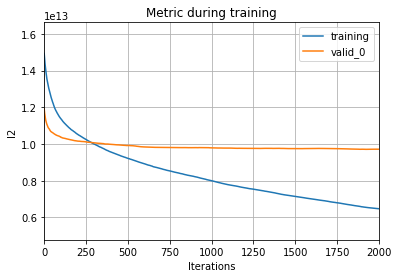

In [24]:
lgbm.plot_metric(model4)

In [22]:
X_test.to_csv('D:/İndirilenler/X_test.csv')

In [23]:
X_test = pd.read_csv('D:/İndirilenler/X_test.csv')
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_test

area  university_mean  slope_mean  secondaryeduc_mean  sea_mean  \
0  100.0              0.0        70.0                 0.0       0.0   

   river_mean  worship_mean  tram_mean  train_mean  tourist_mean  ...  \
0       100.0         100.0        0.0         0.0           0.0  ...   

   firestation_mean  ferry_mean  coachstation_mean  broad_mean  aspect_mean  \
0               0.0       100.0                0.0        90.0          0.0   

   aroad_mean  airport_mean  date_year  freehold  leasehold  
0       100.0           0.0       2019       1.0        0.0  

[1 rows x 39 columns]

In [25]:
lgbm_test_predictions

[919874]

In [27]:
%%time
#CatBoost
model5 = CatBoostRegressor(n_estimators=2000)
model5.fit(X_train, y_train)
print(model5)

Learning rate set to 0.063079
0:	learn: 4262810.4866960	total: 206ms	remaining: 6m 51s
1:	learn: 4251200.4025466	total: 236ms	remaining: 3m 55s
2:	learn: 4233585.5983285	total: 266ms	remaining: 2m 57s
3:	learn: 4224158.8097157	total: 292ms	remaining: 2m 25s
4:	learn: 4208753.6852674	total: 313ms	remaining: 2m 4s
5:	learn: 4201060.1496080	total: 334ms	remaining: 1m 50s
6:	learn: 4192557.3670188	total: 353ms	remaining: 1m 40s
7:	learn: 4185384.2713140	total: 374ms	remaining: 1m 33s
8:	learn: 4171977.8236528	total: 393ms	remaining: 1m 26s
9:	learn: 4163107.1650933	total: 414ms	remaining: 1m 22s
10:	learn: 4158039.2904570	total: 435ms	remaining: 1m 18s
11:	learn: 4151565.5197489	total: 455ms	remaining: 1m 15s
12:	learn: 4141922.3557322	total: 474ms	remaining: 1m 12s
13:	learn: 4131630.0579012	total: 493ms	remaining: 1m 10s
14:	learn: 4121523.4958302	total: 513ms	remaining: 1m 7s
15:	learn: 4113160.8880794	total: 533ms	remaining: 1m 6s
16:	learn: 4108398.8013408	total: 555ms	remaining: 1m 4

152:	learn: 3846127.6364481	total: 3.59s	remaining: 43.4s
153:	learn: 3845195.0807528	total: 3.62s	remaining: 43.4s
154:	learn: 3844747.5478037	total: 3.64s	remaining: 43.3s
155:	learn: 3843951.0093583	total: 3.66s	remaining: 43.3s
156:	learn: 3843257.1360514	total: 3.68s	remaining: 43.2s
157:	learn: 3842036.5070457	total: 3.7s	remaining: 43.2s
158:	learn: 3839624.7869545	total: 3.72s	remaining: 43.1s
159:	learn: 3838615.8752518	total: 3.75s	remaining: 43.1s
160:	learn: 3838320.9005611	total: 3.76s	remaining: 43s
161:	learn: 3837470.4093353	total: 3.79s	remaining: 43s
162:	learn: 3836775.8952293	total: 3.81s	remaining: 42.9s
163:	learn: 3835415.3132142	total: 3.83s	remaining: 42.9s
164:	learn: 3834785.3890137	total: 3.85s	remaining: 42.8s
165:	learn: 3833471.1915808	total: 3.87s	remaining: 42.7s
166:	learn: 3832720.2788371	total: 3.89s	remaining: 42.7s
167:	learn: 3831755.8449146	total: 3.91s	remaining: 42.7s
168:	learn: 3830950.9344729	total: 3.93s	remaining: 42.6s
169:	learn: 3830428

302:	learn: 3717582.6697580	total: 7.03s	remaining: 39.4s
303:	learn: 3715688.7051369	total: 7.05s	remaining: 39.3s
304:	learn: 3715459.0365721	total: 7.07s	remaining: 39.3s
305:	learn: 3715054.5144023	total: 7.09s	remaining: 39.3s
306:	learn: 3714461.1226749	total: 7.11s	remaining: 39.2s
307:	learn: 3713453.7161254	total: 7.13s	remaining: 39.2s
308:	learn: 3712490.1823522	total: 7.15s	remaining: 39.1s
309:	learn: 3712234.3275212	total: 7.17s	remaining: 39.1s
310:	learn: 3711728.5131675	total: 7.19s	remaining: 39.1s
311:	learn: 3711069.9880646	total: 7.21s	remaining: 39s
312:	learn: 3710670.1673746	total: 7.24s	remaining: 39s
313:	learn: 3710312.1289964	total: 7.26s	remaining: 39s
314:	learn: 3709694.0161547	total: 7.28s	remaining: 38.9s
315:	learn: 3708385.7945006	total: 7.3s	remaining: 38.9s
316:	learn: 3707944.9523561	total: 7.32s	remaining: 38.9s
317:	learn: 3707413.8385840	total: 7.34s	remaining: 38.9s
318:	learn: 3706682.5738563	total: 7.36s	remaining: 38.8s
319:	learn: 3706293.2

448:	learn: 3635077.6990368	total: 10.3s	remaining: 35.5s
449:	learn: 3634288.4225526	total: 10.3s	remaining: 35.4s
450:	learn: 3633927.8314045	total: 10.3s	remaining: 35.4s
451:	learn: 3633566.3250724	total: 10.3s	remaining: 35.4s
452:	learn: 3633389.8019983	total: 10.4s	remaining: 35.4s
453:	learn: 3633093.8364344	total: 10.4s	remaining: 35.3s
454:	learn: 3632197.1639369	total: 10.4s	remaining: 35.3s
455:	learn: 3631928.7086938	total: 10.4s	remaining: 35.3s
456:	learn: 3631189.3033027	total: 10.4s	remaining: 35.2s
457:	learn: 3630936.4094369	total: 10.5s	remaining: 35.2s
458:	learn: 3630737.6876323	total: 10.5s	remaining: 35.2s
459:	learn: 3630302.7629186	total: 10.5s	remaining: 35.2s
460:	learn: 3629828.1913969	total: 10.5s	remaining: 35.1s
461:	learn: 3629451.2951394	total: 10.5s	remaining: 35.1s
462:	learn: 3628499.1867732	total: 10.6s	remaining: 35.1s
463:	learn: 3627590.8027801	total: 10.6s	remaining: 35.1s
464:	learn: 3627201.4402437	total: 10.6s	remaining: 35s
465:	learn: 3626

600:	learn: 3570875.9670362	total: 13.7s	remaining: 32s
601:	learn: 3570691.9397762	total: 13.8s	remaining: 31.9s
602:	learn: 3570374.9134883	total: 13.8s	remaining: 31.9s
603:	learn: 3569485.7287414	total: 13.8s	remaining: 31.9s
604:	learn: 3569244.8326622	total: 13.8s	remaining: 31.9s
605:	learn: 3568896.8571615	total: 13.8s	remaining: 31.8s
606:	learn: 3568686.1263407	total: 13.9s	remaining: 31.8s
607:	learn: 3568106.7896768	total: 13.9s	remaining: 31.8s
608:	learn: 3567936.2077494	total: 13.9s	remaining: 31.8s
609:	learn: 3567396.3175660	total: 13.9s	remaining: 31.8s
610:	learn: 3567144.3912121	total: 14s	remaining: 31.8s
611:	learn: 3566767.0589951	total: 14s	remaining: 31.7s
612:	learn: 3566633.4046058	total: 14s	remaining: 31.7s
613:	learn: 3566296.4528507	total: 14s	remaining: 31.7s
614:	learn: 3566099.7845513	total: 14.1s	remaining: 31.6s
615:	learn: 3565420.2326513	total: 14.1s	remaining: 31.6s
616:	learn: 3565269.2242474	total: 14.1s	remaining: 31.6s
617:	learn: 3564876.3885

744:	learn: 3518597.9841375	total: 16.9s	remaining: 28.5s
745:	learn: 3518395.3046571	total: 17s	remaining: 28.5s
746:	learn: 3518205.6179132	total: 17s	remaining: 28.5s
747:	learn: 3518001.1762335	total: 17s	remaining: 28.5s
748:	learn: 3517860.3743135	total: 17s	remaining: 28.4s
749:	learn: 3517759.0310480	total: 17s	remaining: 28.4s
750:	learn: 3517566.4853277	total: 17.1s	remaining: 28.4s
751:	learn: 3517116.4751605	total: 17.1s	remaining: 28.3s
752:	learn: 3516643.2827646	total: 17.1s	remaining: 28.3s
753:	learn: 3516439.0142607	total: 17.1s	remaining: 28.3s
754:	learn: 3516115.2171470	total: 17.1s	remaining: 28.3s
755:	learn: 3515833.8636433	total: 17.2s	remaining: 28.2s
756:	learn: 3515621.6233378	total: 17.2s	remaining: 28.2s
757:	learn: 3515471.5509204	total: 17.2s	remaining: 28.2s
758:	learn: 3515302.7162381	total: 17.2s	remaining: 28.2s
759:	learn: 3514835.1186996	total: 17.3s	remaining: 28.1s
760:	learn: 3514145.1871997	total: 17.3s	remaining: 28.1s
761:	learn: 3513624.8028

891:	learn: 3473863.5799030	total: 20.1s	remaining: 25s
892:	learn: 3473259.7778549	total: 20.1s	remaining: 24.9s
893:	learn: 3473129.6357717	total: 20.1s	remaining: 24.9s
894:	learn: 3472999.7035866	total: 20.2s	remaining: 24.9s
895:	learn: 3472439.0938208	total: 20.2s	remaining: 24.9s
896:	learn: 3472228.3762013	total: 20.2s	remaining: 24.8s
897:	learn: 3472003.5158787	total: 20.2s	remaining: 24.8s
898:	learn: 3471899.0474873	total: 20.2s	remaining: 24.8s
899:	learn: 3471442.8333405	total: 20.3s	remaining: 24.8s
900:	learn: 3471289.9011820	total: 20.3s	remaining: 24.8s
901:	learn: 3471090.5321578	total: 20.3s	remaining: 24.7s
902:	learn: 3470926.1036696	total: 20.3s	remaining: 24.7s
903:	learn: 3470542.3198972	total: 20.4s	remaining: 24.7s
904:	learn: 3470329.0206864	total: 20.4s	remaining: 24.7s
905:	learn: 3470129.3277306	total: 20.4s	remaining: 24.6s
906:	learn: 3469978.8682141	total: 20.4s	remaining: 24.6s
907:	learn: 3469732.2212213	total: 20.5s	remaining: 24.6s
908:	learn: 3469

1041:	learn: 3432502.5372053	total: 23.2s	remaining: 21.4s
1042:	learn: 3432388.8911711	total: 23.3s	remaining: 21.3s
1043:	learn: 3431997.4181518	total: 23.3s	remaining: 21.3s
1044:	learn: 3431764.8523700	total: 23.3s	remaining: 21.3s
1045:	learn: 3431580.7466814	total: 23.3s	remaining: 21.3s
1046:	learn: 3431473.5039931	total: 23.3s	remaining: 21.3s
1047:	learn: 3431249.1422080	total: 23.4s	remaining: 21.2s
1048:	learn: 3431119.8392774	total: 23.4s	remaining: 21.2s
1049:	learn: 3430937.4523443	total: 23.4s	remaining: 21.2s
1050:	learn: 3430786.8987590	total: 23.4s	remaining: 21.2s
1051:	learn: 3430547.4159699	total: 23.4s	remaining: 21.1s
1052:	learn: 3430349.2331745	total: 23.5s	remaining: 21.1s
1053:	learn: 3430051.6514087	total: 23.5s	remaining: 21.1s
1054:	learn: 3429776.7098391	total: 23.5s	remaining: 21.1s
1055:	learn: 3429351.7318617	total: 23.5s	remaining: 21.1s
1056:	learn: 3429152.3000495	total: 23.6s	remaining: 21s
1057:	learn: 3428980.7939731	total: 23.6s	remaining: 21s
1

1189:	learn: 3397814.5030268	total: 26.4s	remaining: 18s
1190:	learn: 3397636.0357535	total: 26.4s	remaining: 17.9s
1191:	learn: 3397409.1212045	total: 26.4s	remaining: 17.9s
1192:	learn: 3397083.9175279	total: 26.5s	remaining: 17.9s
1193:	learn: 3396928.9571558	total: 26.5s	remaining: 17.9s
1194:	learn: 3396851.3777318	total: 26.5s	remaining: 17.9s
1195:	learn: 3396624.0515861	total: 26.5s	remaining: 17.8s
1196:	learn: 3396336.7719705	total: 26.5s	remaining: 17.8s
1197:	learn: 3396115.4392044	total: 26.6s	remaining: 17.8s
1198:	learn: 3395859.0648417	total: 26.6s	remaining: 17.8s
1199:	learn: 3395580.6887688	total: 26.6s	remaining: 17.7s
1200:	learn: 3395416.3824646	total: 26.6s	remaining: 17.7s
1201:	learn: 3395322.6893616	total: 26.6s	remaining: 17.7s
1202:	learn: 3395187.6813687	total: 26.7s	remaining: 17.7s
1203:	learn: 3394807.5146010	total: 26.7s	remaining: 17.7s
1204:	learn: 3394311.7115616	total: 26.7s	remaining: 17.6s
1205:	learn: 3394052.5201035	total: 26.8s	remaining: 17.6s

1338:	learn: 3363948.7878586	total: 29.5s	remaining: 14.6s
1339:	learn: 3363698.9833243	total: 29.5s	remaining: 14.6s
1340:	learn: 3363092.2502841	total: 29.6s	remaining: 14.5s
1341:	learn: 3362947.2884940	total: 29.6s	remaining: 14.5s
1342:	learn: 3362861.7314749	total: 29.6s	remaining: 14.5s
1343:	learn: 3362645.7965994	total: 29.6s	remaining: 14.5s
1344:	learn: 3362505.8896214	total: 29.7s	remaining: 14.4s
1345:	learn: 3362273.4614264	total: 29.7s	remaining: 14.4s
1346:	learn: 3362080.3070739	total: 29.7s	remaining: 14.4s
1347:	learn: 3361972.0031808	total: 29.7s	remaining: 14.4s
1348:	learn: 3361893.1298845	total: 29.8s	remaining: 14.4s
1349:	learn: 3361671.0104313	total: 29.8s	remaining: 14.3s
1350:	learn: 3361421.4172910	total: 29.8s	remaining: 14.3s
1351:	learn: 3361123.9844139	total: 29.8s	remaining: 14.3s
1352:	learn: 3360762.2817907	total: 29.8s	remaining: 14.3s
1353:	learn: 3360561.1458845	total: 29.9s	remaining: 14.2s
1354:	learn: 3360364.9850592	total: 29.9s	remaining: 14.

1485:	learn: 3332011.6767072	total: 32.7s	remaining: 11.3s
1486:	learn: 3331653.4042358	total: 32.7s	remaining: 11.3s
1487:	learn: 3331301.4160739	total: 32.8s	remaining: 11.3s
1488:	learn: 3331047.6129667	total: 32.8s	remaining: 11.3s
1489:	learn: 3330867.7827906	total: 32.8s	remaining: 11.2s
1490:	learn: 3330490.9322137	total: 32.8s	remaining: 11.2s
1491:	learn: 3330476.9723529	total: 32.8s	remaining: 11.2s
1492:	learn: 3330310.8164363	total: 32.9s	remaining: 11.2s
1493:	learn: 3330188.4315036	total: 32.9s	remaining: 11.1s
1494:	learn: 3329791.9004889	total: 32.9s	remaining: 11.1s
1495:	learn: 3329589.3932674	total: 32.9s	remaining: 11.1s
1496:	learn: 3329380.1124162	total: 33s	remaining: 11.1s
1497:	learn: 3329275.4980852	total: 33s	remaining: 11.1s
1498:	learn: 3329085.3905772	total: 33s	remaining: 11s
1499:	learn: 3328735.5538052	total: 33s	remaining: 11s
1500:	learn: 3328391.0139695	total: 33.1s	remaining: 11s
1501:	learn: 3328300.6389374	total: 33.1s	remaining: 11s
1502:	learn: 

1633:	learn: 3306506.0878663	total: 35.8s	remaining: 8.03s
1634:	learn: 3306342.6904057	total: 35.9s	remaining: 8.01s
1635:	learn: 3306186.3213596	total: 35.9s	remaining: 7.99s
1636:	learn: 3305990.2716554	total: 35.9s	remaining: 7.97s
1637:	learn: 3305851.8755355	total: 35.9s	remaining: 7.94s
1638:	learn: 3305738.4468133	total: 36s	remaining: 7.92s
1639:	learn: 3305622.2000467	total: 36s	remaining: 7.9s
1640:	learn: 3305515.1497838	total: 36s	remaining: 7.88s
1641:	learn: 3305436.3289864	total: 36s	remaining: 7.85s
1642:	learn: 3305244.1470341	total: 36s	remaining: 7.83s
1643:	learn: 3305089.8178726	total: 36.1s	remaining: 7.81s
1644:	learn: 3304913.7310502	total: 36.1s	remaining: 7.79s
1645:	learn: 3304658.8965592	total: 36.1s	remaining: 7.76s
1646:	learn: 3304507.8247375	total: 36.1s	remaining: 7.74s
1647:	learn: 3304259.8060228	total: 36.1s	remaining: 7.72s
1648:	learn: 3304074.0038989	total: 36.2s	remaining: 7.7s
1649:	learn: 3303560.1494006	total: 36.2s	remaining: 7.68s
1650:	lea

1774:	learn: 3283045.3653971	total: 38.8s	remaining: 4.91s
1775:	learn: 3282690.9375111	total: 38.8s	remaining: 4.89s
1776:	learn: 3282533.7260902	total: 38.8s	remaining: 4.87s
1777:	learn: 3282382.9727308	total: 38.8s	remaining: 4.85s
1778:	learn: 3282213.8556485	total: 38.8s	remaining: 4.82s
1779:	learn: 3282110.6021212	total: 38.9s	remaining: 4.8s
1780:	learn: 3281914.4073784	total: 38.9s	remaining: 4.78s
1781:	learn: 3281782.1596333	total: 38.9s	remaining: 4.76s
1782:	learn: 3281476.8357980	total: 38.9s	remaining: 4.74s
1783:	learn: 3281402.6228456	total: 38.9s	remaining: 4.71s
1784:	learn: 3281254.5023795	total: 39s	remaining: 4.69s
1785:	learn: 3281050.3737486	total: 39s	remaining: 4.67s
1786:	learn: 3280964.4515418	total: 39s	remaining: 4.65s
1787:	learn: 3280882.9255950	total: 39s	remaining: 4.63s
1788:	learn: 3280834.5988360	total: 39s	remaining: 4.6s
1789:	learn: 3280580.4776675	total: 39.1s	remaining: 4.58s
1790:	learn: 3280480.0080851	total: 39.1s	remaining: 4.56s
1791:	lea

1915:	learn: 3260585.2965914	total: 41.8s	remaining: 1.83s
1916:	learn: 3260478.8713012	total: 41.8s	remaining: 1.81s
1917:	learn: 3260280.9343116	total: 41.8s	remaining: 1.79s
1918:	learn: 3260062.4648467	total: 41.8s	remaining: 1.77s
1919:	learn: 3259937.8127144	total: 41.9s	remaining: 1.74s
1920:	learn: 3259848.5216052	total: 41.9s	remaining: 1.72s
1921:	learn: 3259790.7503127	total: 41.9s	remaining: 1.7s
1922:	learn: 3259715.1313470	total: 41.9s	remaining: 1.68s
1923:	learn: 3259686.7651583	total: 41.9s	remaining: 1.66s
1924:	learn: 3259592.8995630	total: 42s	remaining: 1.63s
1925:	learn: 3259537.0263965	total: 42s	remaining: 1.61s
1926:	learn: 3259278.1959369	total: 42s	remaining: 1.59s
1927:	learn: 3259042.9432126	total: 42s	remaining: 1.57s
1928:	learn: 3258929.7033198	total: 42s	remaining: 1.55s
1929:	learn: 3258728.0929595	total: 42.1s	remaining: 1.52s
1930:	learn: 3258405.9750855	total: 42.1s	remaining: 1.5s
1931:	learn: 3258314.8451497	total: 42.1s	remaining: 1.48s
1932:	lea

In [28]:
%%time
# make predictions for train data
catboost_y_pred_train = model5.predict(X_train)
catboost_train_predictions = [round(value) for value in catboost_y_pred_train]

Wall time: 604 ms


In [29]:
catboost_train_r2_score = r2_score(y_train, catboost_y_pred_train)
print("R2 Train Score for CatBoost: {}".format(catboost_train_r2_score))

catboost_train_adj_r2_score = 1 - (1-catboost_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for CatBoost: {}".format(catboost_train_adj_r2_score))

catboost_train_mae = mean_absolute_error(y_train, catboost_y_pred_train)
print("Train MAE for CatBoost: {}".format(catboost_train_mae))

catboost_train_mape = mean_absolute_percentage_error(y_train, catboost_y_pred_train)
print("Train MAPE for CatBoost: {}".format(catboost_train_mape))

catboost_train_mse = mean_squared_error(y_train, catboost_y_pred_train)
catboost_train_rmse = np.sqrt(catboost_train_mse)
print("Train RMSE for CatBoost: {}".format(catboost_train_rmse))

R2 Train Score for CatBoost: 0.4226274158632536
Train Adjusted R2 Score for CatBoost: 0.4225487082814655
Train MAE for CatBoost: 929765.0542413591
Train MAPE for CatBoost: 39.108962849314814
Train RMSE for CatBoost: 3248592.023789046


In [144]:
%%time
# make predictions for validation data
catboost_y_pred_val = model5.predict(X_validation)
catboost_val_predictions = [round(value) for value in catboost_y_pred_val]

Wall time: 10.8 ms


In [145]:
catboost_val_r2_score = r2_score(y_validation, catboost_y_pred_val)
print("Validation R2 Score for CatBoost: {}".format(catboost_val_r2_score))

catboost_val_adj_r2_score = 1 - (1-catboost_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for CatBoost: {}".format(catboost_val_adj_r2_score))

catboost_val_mae = mean_absolute_error(y_validation, catboost_y_pred_val)
print("Validation MAE for CatBoost: {}".format(catboost_val_mae))

catboost_val_mape = mean_absolute_percentage_error(y_validation, catboost_y_pred_val)
print("Validation MAPE for CatBoost: {}".format(catboost_val_mape))

catboost_val_mse = mean_squared_error(y_validation, catboost_y_pred_val)
catboost_val_rmse = np.sqrt(catboost_val_mse)
print("Validation RMSE for CatBoost: {}".format(catboost_val_rmse))

Validation R2 Score for CatBoost: 0.44226657209858355
Validation Adjusted R2 Score for CatBoost: 0.4344571681946686
Validation MAE for CatBoost: 53695.994565002555
Validation MAPE for CatBoost: 0.2832701168080086
Validation RMSE for CatBoost: 81982.00677917559


In [146]:
# make predictions for test data
catboost_y_pred_test = model5.predict(X_test)
catboost_test_predictions = [round(value) for value in catboost_y_pred_test]

In [147]:
catboost_test_r2_score = r2_score(y_test, catboost_y_pred_test)
print("Test R2 Score for CatBoost: {}".format(catboost_test_r2_score))

catboost_test_adj_r2_score = 1 - (1-catboost_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for CatBoost: {}".format(catboost_test_adj_r2_score))

catboost_test_mae = mean_absolute_error(y_test, catboost_y_pred_test)
print("Test MAE for CatBoost: {}".format(catboost_test_mae))

catboost_test_mape = mean_absolute_percentage_error(y_test, catboost_y_pred_test)
print("Test MAPE for CatBoost: {}".format(catboost_test_mape))

catboost_test_mse = mean_squared_error(y_test, catboost_y_pred_test)
catboost_test_rmse = np.sqrt(catboost_test_mse)
print("Test RMSE for CatBoost: {}".format(catboost_test_rmse))

Test R2 Score for CatBoost: 0.8892067209877087
Test Adjusted R2 Score for CatBoost: 0.887863920118234
Test MAE for CatBoost: 26030.185940444306
Test MAPE for CatBoost: 0.16631566985482252
Test RMSE for CatBoost: 45173.483637783844


In [38]:
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test = scaler.transform(X_test)

In [39]:
%%time
#LinearRegression
model6 = LinearRegression()
model6.fit(X_train, y_train)
print(model6)

LinearRegression()
Wall time: 8.39 s


In [40]:
%%time
# make predictions for train data
lin_y_pred_train = model6.predict(X_train)
lin_train_predictions = [round(value) for value in lin_y_pred_train]

Wall time: 7.02 s


In [41]:
lin_train_r2_score = r2_score(y_train, lin_y_pred_train)
print("Train R2 Score for LinearRegression: {}".format(lin_train_r2_score))

lin_train_adj_r2_score = 1 - (1-lin_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LinearRegression: {}".format(lin_train_adj_r2_score))

lin_train_mae = mean_absolute_error(y_train, lin_y_pred_train)
print("Train MAE for LinearRegression: {}".format(lin_train_mae))

lin_train_mape = mean_absolute_percentage_error(y_train, lin_y_pred_train)
print("Train MAPE for LinearRegression: {}".format(lin_train_mape))

lin_train_mse = mean_squared_error(y_train, lin_y_pred_train)
lin_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LinearRegression: {}".format(lin_train_rmse))

Train R2 Score for LinearRegression: 0.45505947521966206
Train Adjusted R2 Score for LinearRegression: 0.4550536806124962
Train MAE for LinearRegression: 100949.07055330864
Train MAPE for LinearRegression: 0.4964011590795884
Train RMSE for LinearRegression: 110420.67328523577


In [42]:
%%time
# make predictions for validation data
lin_y_pred_val = model6.predict(X_validation)
lin_val_predictions = [round(value) for value in lin_y_pred_val]

C:\Users\METE\anaconda3\envs\geo\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Wall time: 429 ms


In [43]:
lin_val_r2_score = r2_score(y_validation, lin_y_pred_val)
print("Validation R2 Score for LinearRegression: {}".format(lin_val_r2_score))

lin_val_adj_r2_score = 1 - (1-lin_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for LinearRegression: {}".format(lin_val_adj_r2_score))

lin_val_mae = mean_absolute_error(y_validation, lin_y_pred_val)
print("Validation MAE for LinearRegression: {}".format(lin_val_mae))

lin_val_mape = mean_absolute_percentage_error(y_validation, lin_y_pred_val)
print("Validation MAPE for LinearRegression: {}".format(lin_val_mape))

lin_val_mse = mean_squared_error(y_validation, lin_y_pred_val)
lin_val_rmse = np.sqrt(lin_val_mse)
print("Validation RMSE for LinearRegression: {}".format(lin_val_rmse))

Validation R2 Score for LinearRegression: -8.169267450856633e+18
Validation Adjusted R2 Score for LinearRegression: -8.170918252577808e+18
Validation MAE for LinearRegression: 747036773202101.1
Validation MAPE for LinearRegression: 4530853139.425681
Validation RMSE for LinearRegression: 752004692780117.1


In [44]:
# make predictions for test data
lin_y_pred_test = model6.predict(X_test)
lin_test_predictions = [round(value) for value in lin_y_pred_test]

In [45]:
lin_test_r2_score = r2_score(y_test, lin_y_pred_test)
print("Test R2 Score for LinearRegression: {}".format(lin_test_r2_score))

lin_test_adj_r2_score = 1 - (1-lin_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LinearRegression: {}".format(lin_test_adj_r2_score))

lin_test_mae = mean_absolute_error(y_test, lin_y_pred_test)
print("Test MAE for LinearRegression: {}".format(lin_test_mae))

lin_test_mape = mean_absolute_percentage_error(y_test, lin_y_pred_test)
print("Test MAPE for LinearRegression: {}".format(lin_test_mape))

lin_test_mse = mean_squared_error(y_test, lin_y_pred_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("Test RMSE for LinearRegression: {}".format(lin_test_rmse))

Test R2 Score for LinearRegression: 0.4472764616557263
Test Adjusted R2 Score for LinearRegression: 0.4471703557133151
Test MAE for LinearRegression: 101442.60356679621
Test MAPE for LinearRegression: 0.4986674571854904
Test RMSE for LinearRegression: 200851.51479729582


In [35]:
importance = pd.DataFrame({"Importance": model2.feature_importances_},
                         index=X.columns)

In [36]:
importance

Importance
area                  0.097610
university_mean       0.013831
slope_mean            0.050098
secondaryeduc_mean    0.024472
sea_mean              0.009308
river_mean            0.021852
worship_mean          0.034240
tram_mean             0.007785
train_mean            0.025825
tourist_mean          0.018457
subway_mean           0.034306
sports_mean           0.030702
post_mean             0.023107
passferry_mean        0.007697
musem_mean            0.023471
library_mean          0.026825
furteduc_mean         0.026678
citycenter_mean       0.016237
bus_mean              0.029433
art_mean              0.022862
primaryeduc_mean      0.032886
port_mean             0.012686
police_mean           0.014580
park_mean             0.020675
medical_mean          0.021075
mall_mean             0.015068
junction_mean         0.025296
hospital_mean         0.019478
green_mean            0.024230
firestation_mean      0.017235
ferry_mean            0.006639
coachstation_mean     0.027681
broad_mean            0.018264
aspect_mean           0.025122
aroad_mean            0.028065
airport_mean          0.015476
date_year             0.108934
freehold              0.010853
leasehold             0.010960

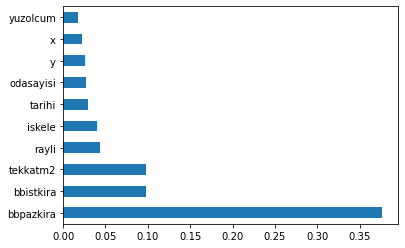

In [54]:
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
fig= ax.figure
#fig.set_size_inches(6, 2)
#fig.savefig('C:/Users/METE/Pictures/featureimp_land2.png', format='png', dpi=600)

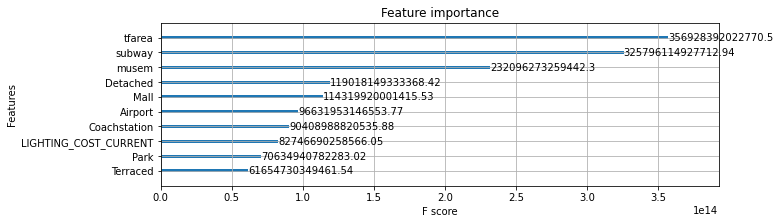

In [52]:
#XGB Feature Importance
ax = xgb.plot_importance(model, max_num_features=10, importance_type='gain', show_values=True) 

fig = ax.figure
fig.set_size_inches(10, 3)

In [16]:
model2.feature_importances_

array([2.15260111e-02, 3.67829914e-01, 9.84932847e-03, 3.12088058e-03,
       4.24669786e-03, 2.99234453e-02, 2.50223804e-03, 1.75312152e-03,
       3.77777680e-03, 3.68130191e-02, 3.16889289e-03, 5.89998289e-03,
       8.98618347e-03, 1.80234611e-02, 3.70941077e-02, 9.06232052e-03,
       2.40883622e-02, 9.02586286e-03, 1.42666796e-02, 4.35643610e-03,
       1.04768543e-02, 8.63515901e-03, 6.43385825e-03, 1.12524980e-02,
       6.22234413e-03, 4.42259116e-02, 2.49455980e-03, 6.29712078e-03,
       7.66518209e-03, 1.85222363e-01, 6.63591941e-03, 1.05359712e-02,
       4.16415627e-03, 3.75799410e-03, 2.80664598e-03, 5.53405299e-03,
       6.33044174e-03, 7.79671478e-03, 1.12522505e-02, 1.61226976e-02,
       6.75095398e-04, 1.13172380e-02, 1.01468653e-03, 1.64007000e-03,
       2.42779165e-03, 1.41317657e-04, 1.50646261e-04, 1.71572714e-03,
       1.74000968e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

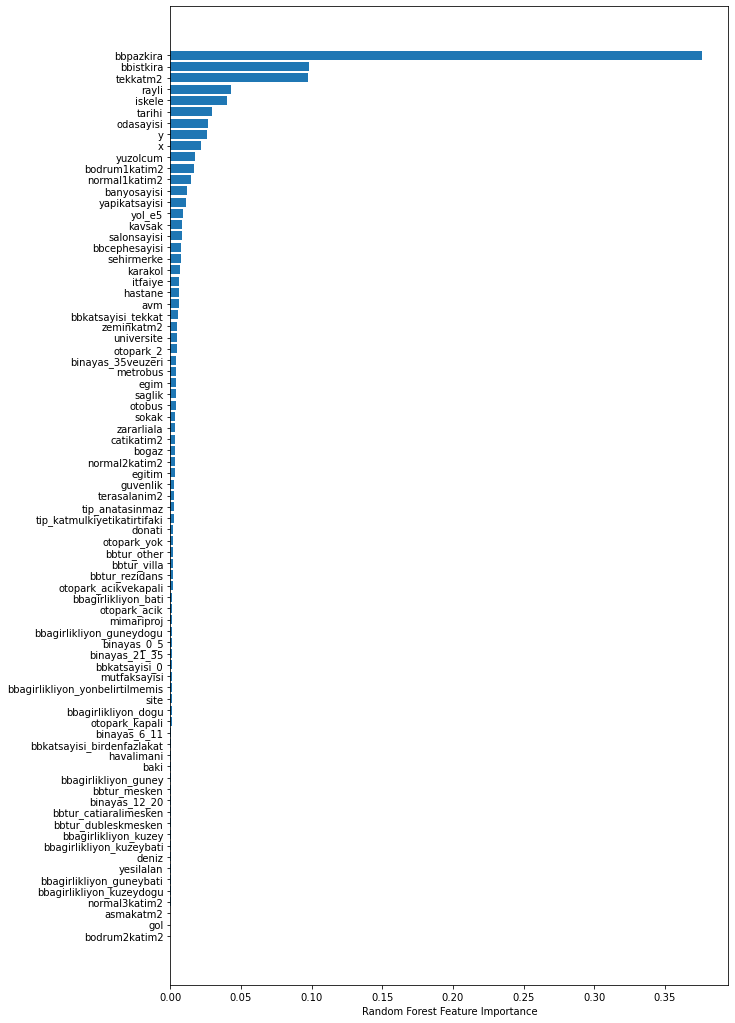

In [55]:
fig, ax = plt.subplots(figsize=(10,18))
sorted_idx = model2.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [56]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Wall time: 0 ns


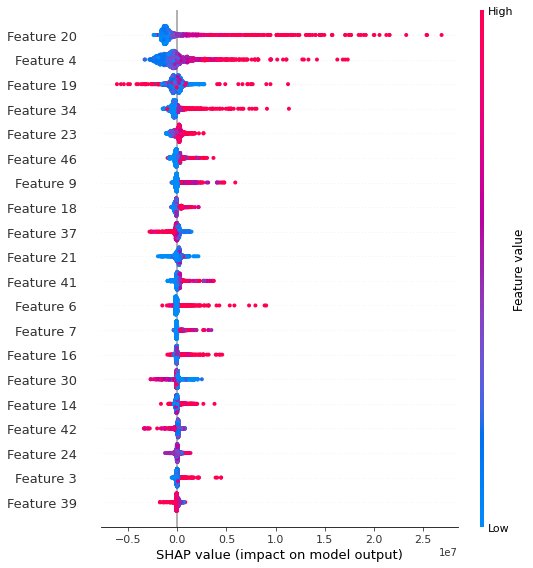

In [63]:
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, X_train.values)

In [57]:
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train.values

explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

Wall time: 0 ns


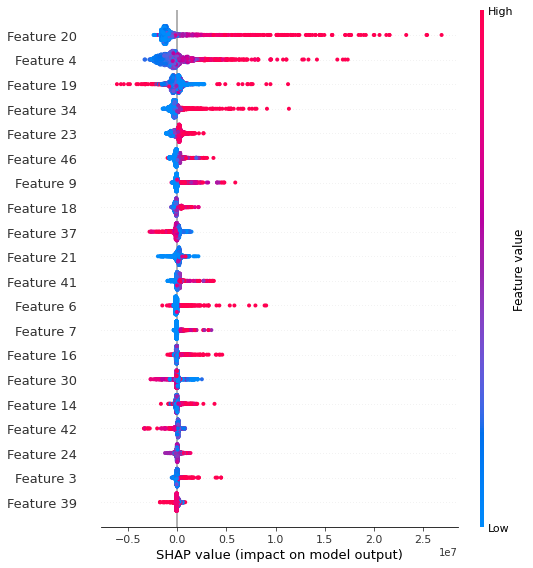

In [58]:
shap.summary_plot(shap_values, samples)

In [29]:
X_train.columns

Index(['area', 'university_mean', 'slope_mean', 'secondaryeduc_mean',
       'sea_mean', 'river_mean', 'worship_mean', 'tram_mean', 'train_mean',
       'tourist_mean', 'subway_mean', 'sports_mean', 'post_mean',
       'passferry_mean', 'musem_mean', 'library_mean', 'furteduc_mean',
       'citycenter_mean', 'bus_mean', 'art_mean', 'primaryeduc_mean',
       'port_mean', 'police_mean', 'park_mean', 'medical_mean', 'mall_mean',
       'junction_mean', 'hospital_mean', 'green_mean', 'firestation_mean',
       'ferry_mean', 'coachstation_mean', 'broad_mean', 'aspect_mean',
       'aroad_mean', 'airport_mean', 'date_year', 'freehold', 'leasehold'],
      dtype='object')

In [28]:
#ilk bin verinin shap değeri
shap.force_plot(explainer.expected_value, shap_values[:1000,:], samples.iloc[:1000,:])

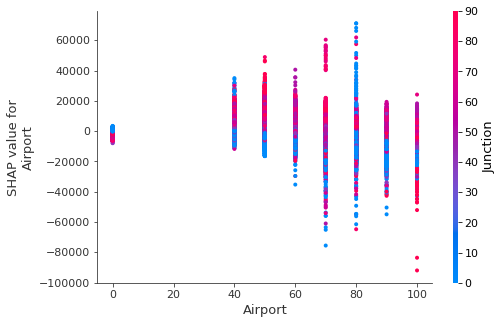

In [18]:
shap.dependence_plot("Airport", shap_values, X_train)

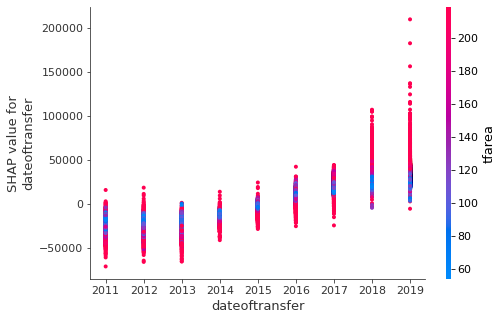

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


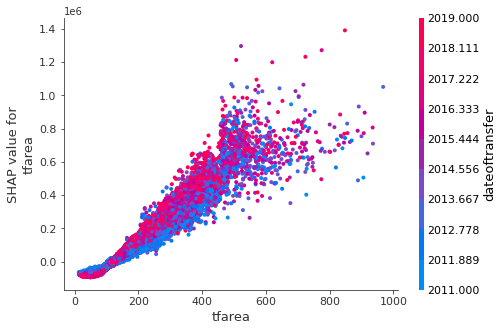

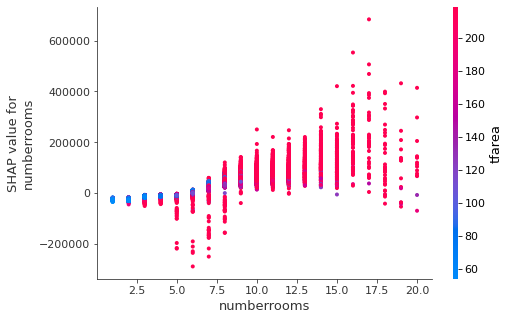

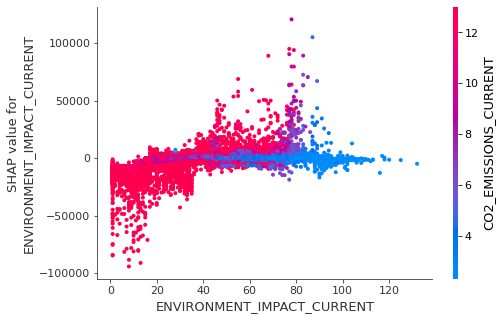

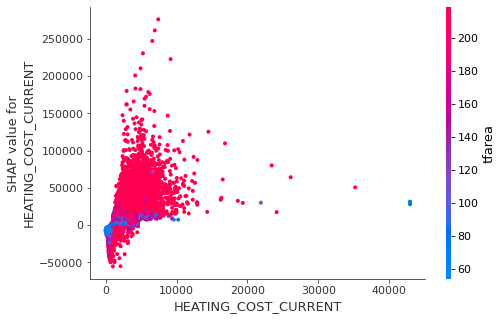

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


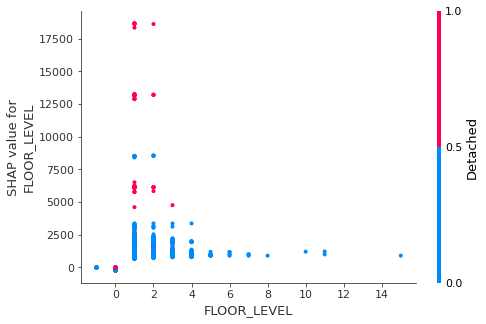

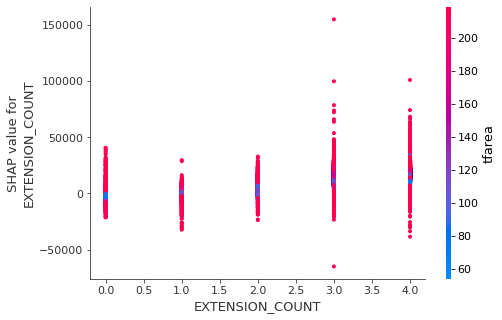

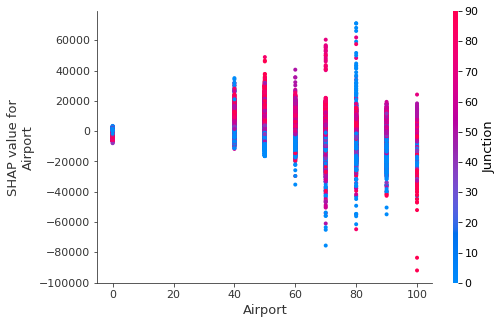

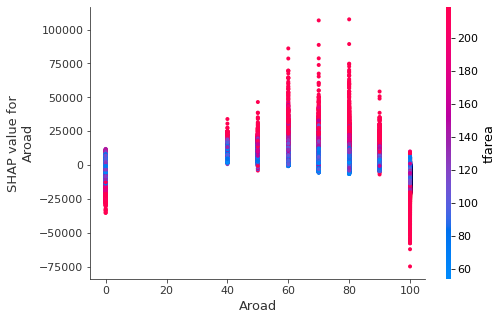

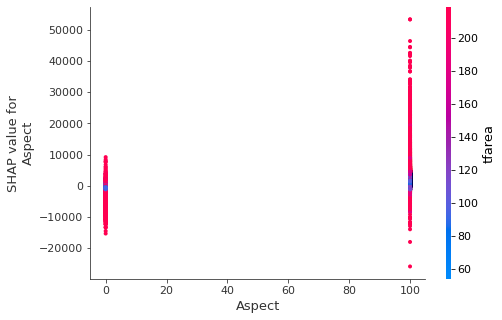

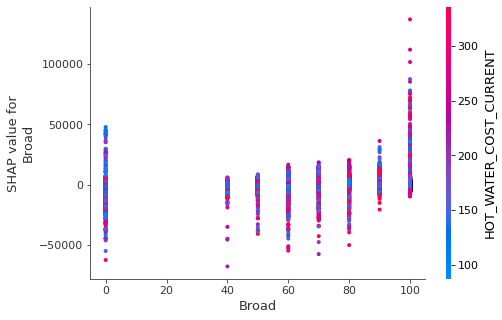

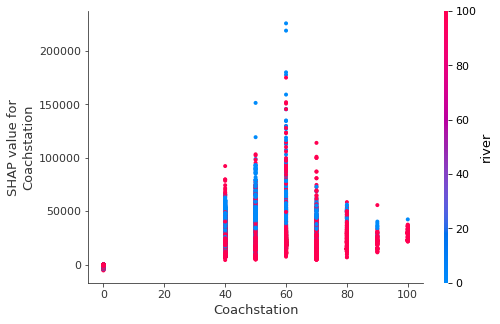

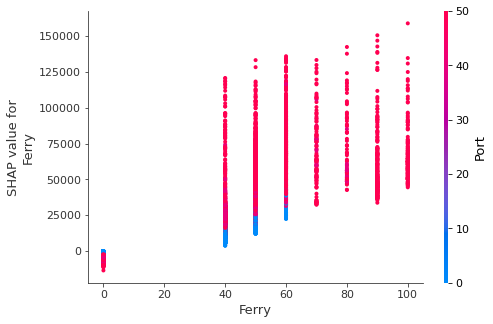

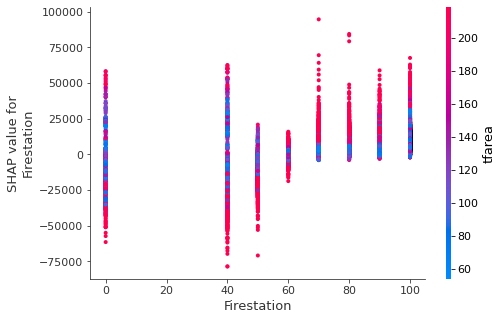

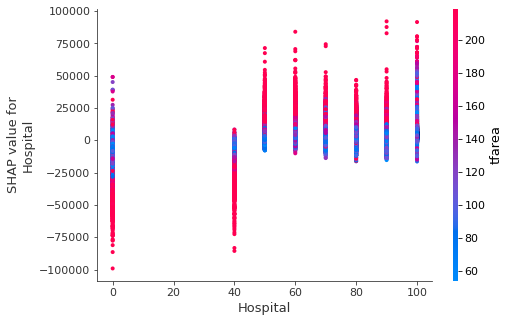

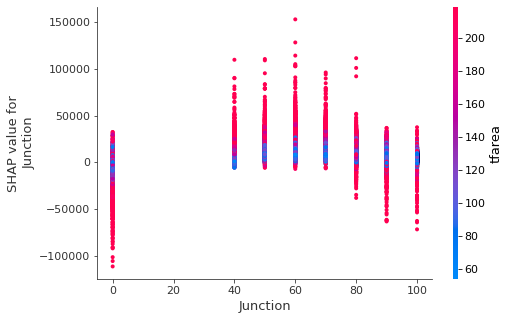

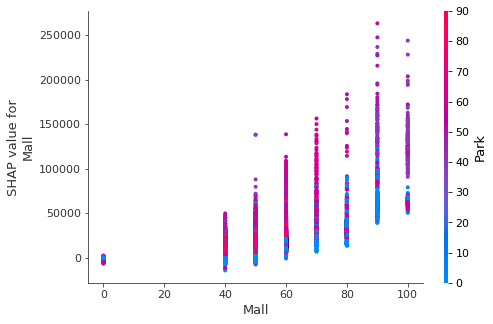

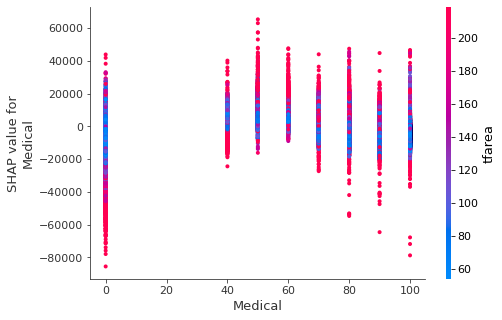

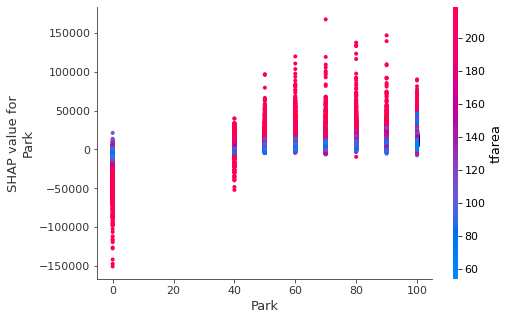

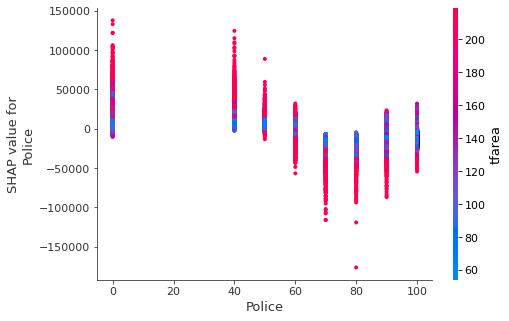

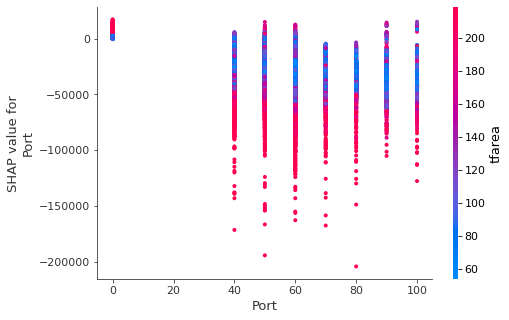

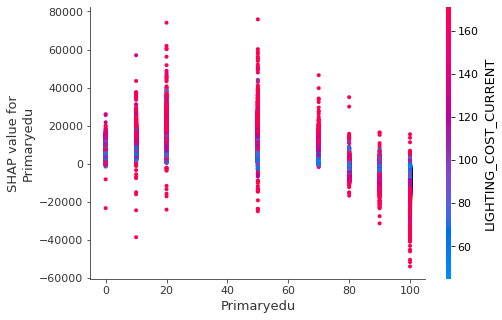

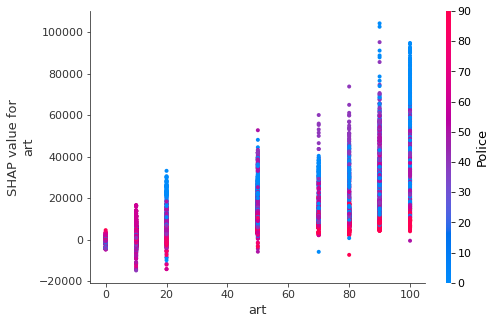

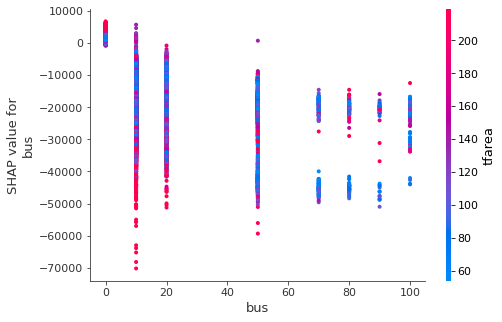

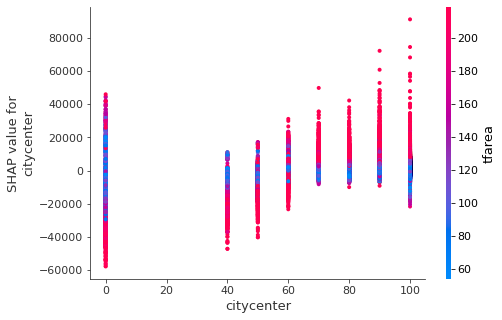

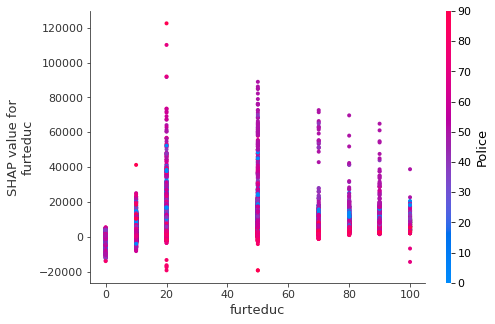

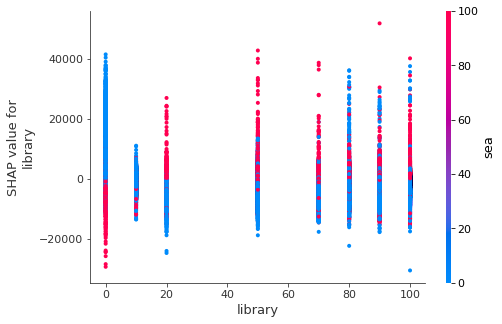

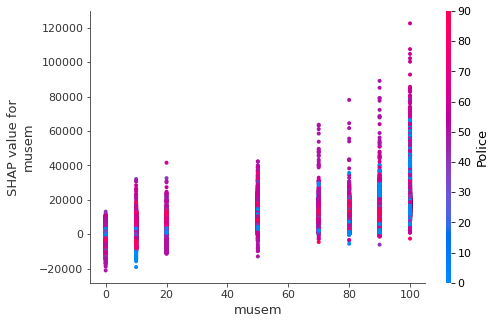

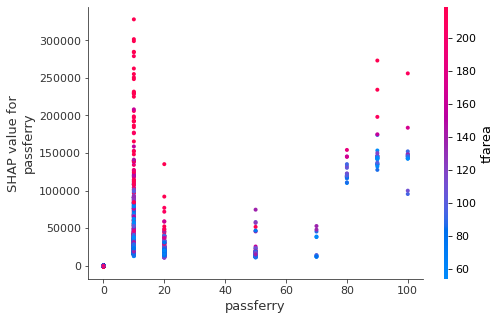

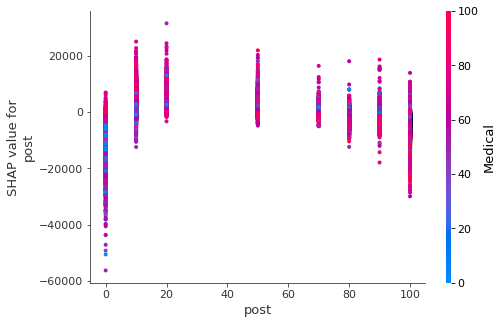

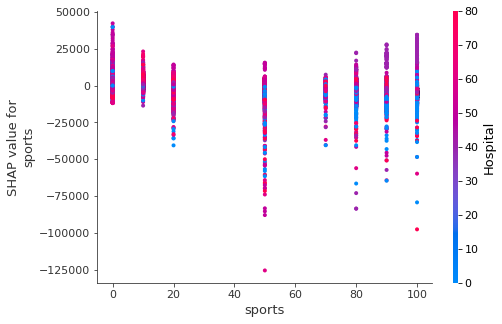

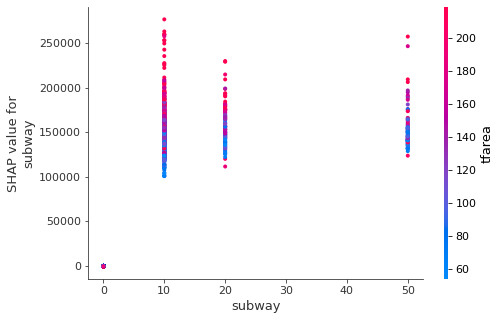

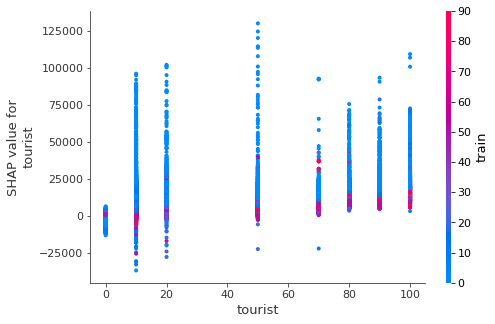

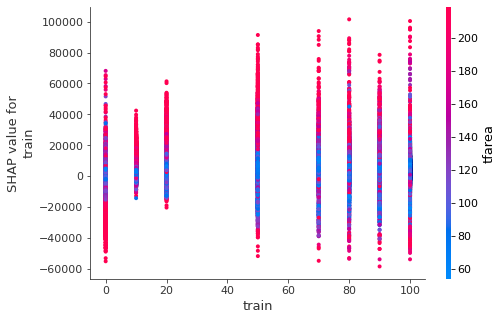

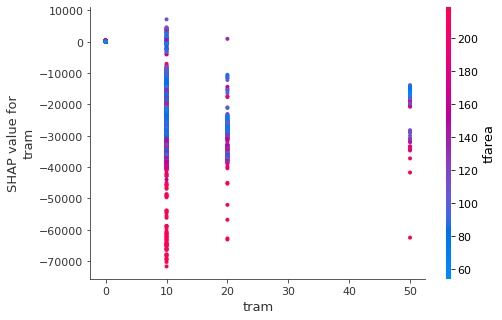

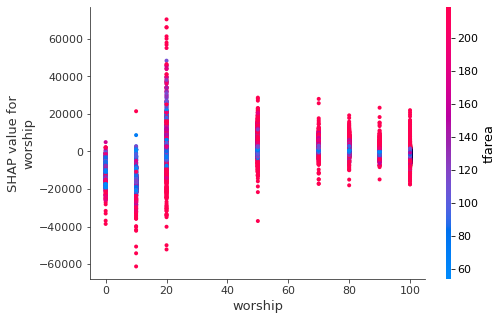

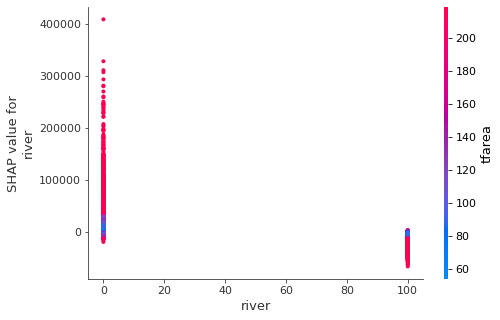

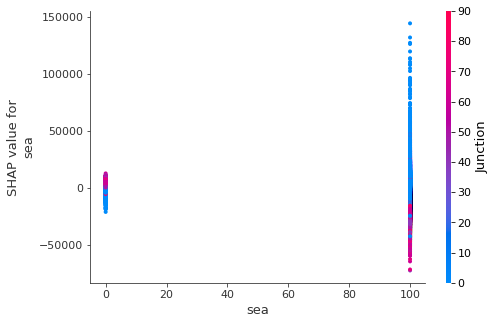

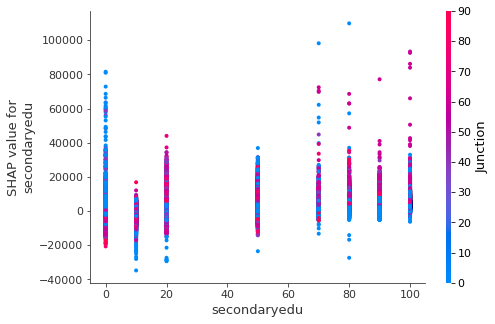

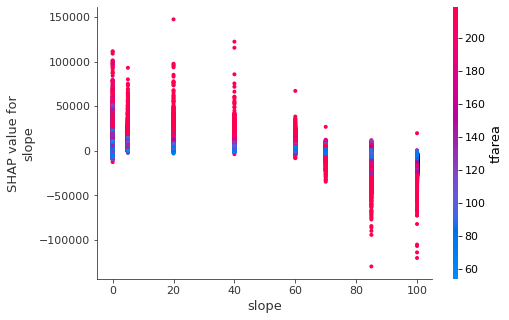

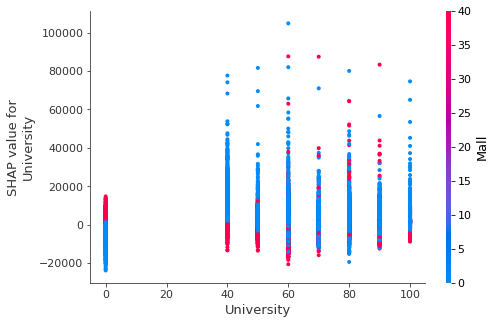

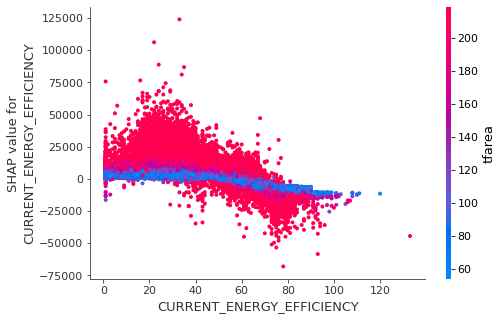

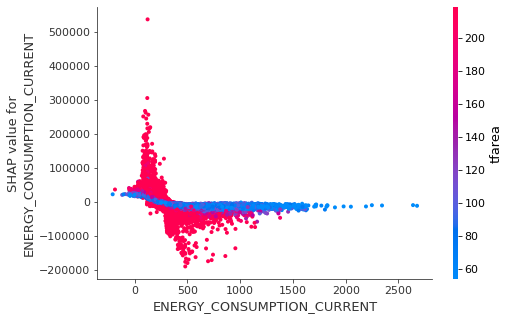

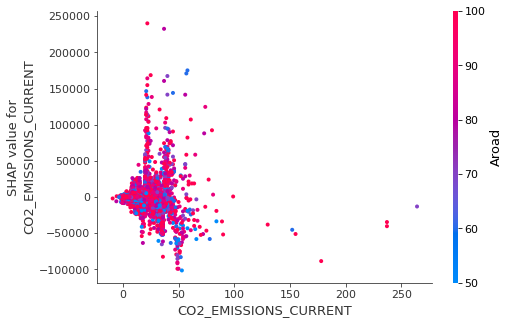

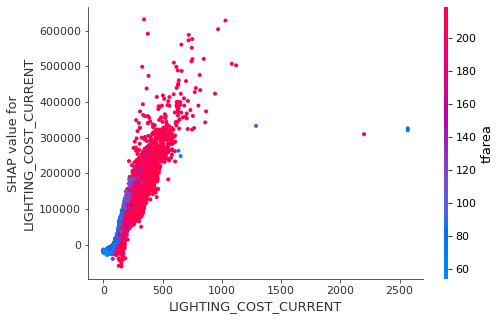

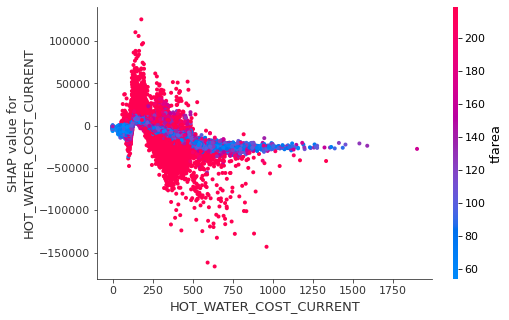

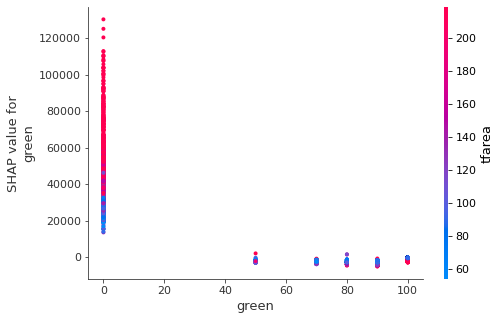

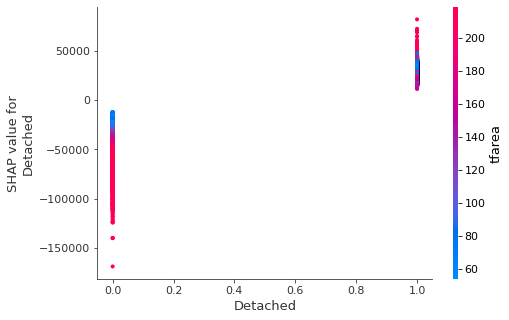

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


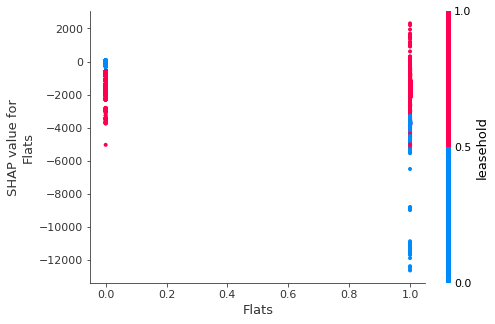

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


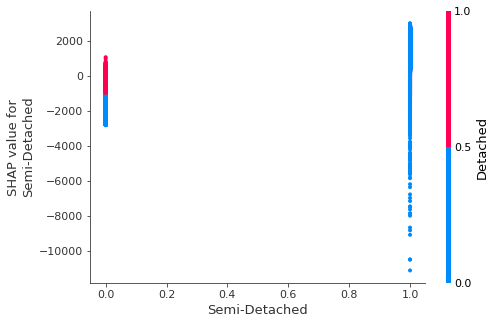

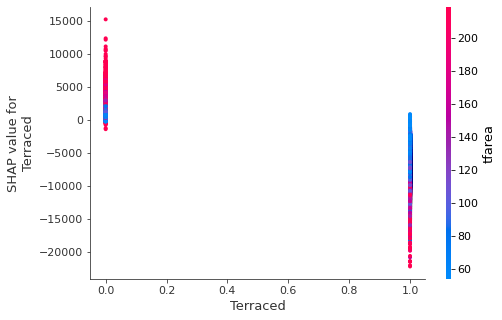

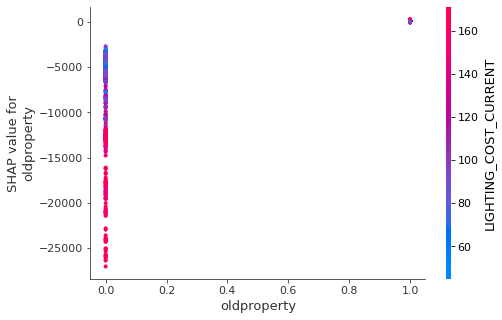

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


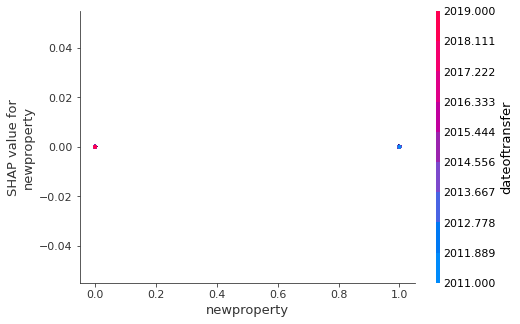

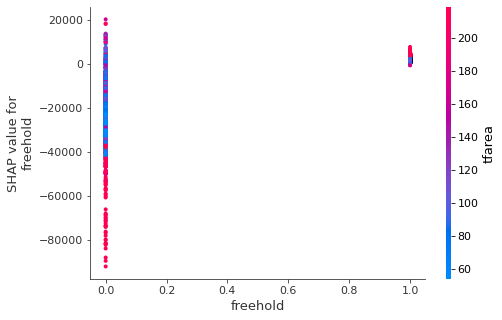

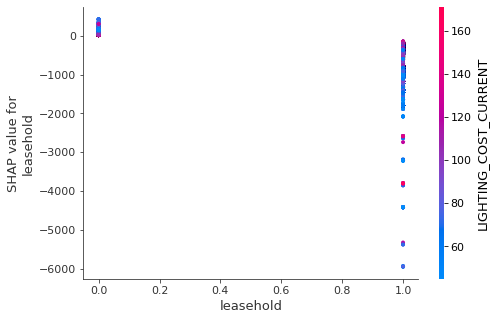

In [21]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train)

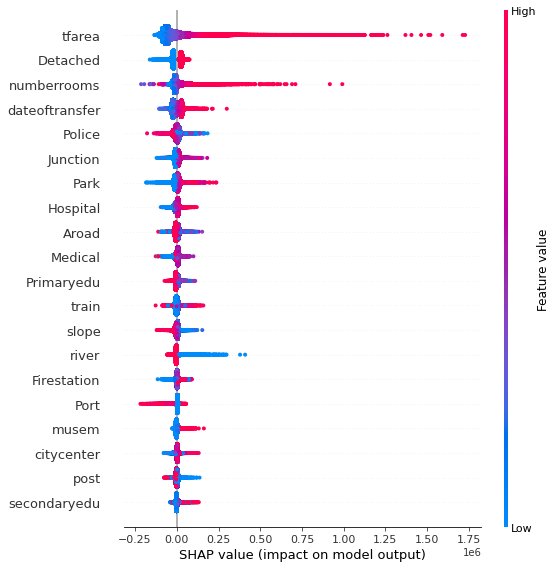

AttributeError: 'NoneType' object has no attribute 'figure'

In [25]:
ax = shap.summary_plot(shap_values, samples)
fig = ax.figure
fig.savefig('C:/Users/METE/Pictures/MLPPD/SHAP/shapelyvalue_cluster1.png', format='png', dpi=1200)

In [ ]:
""""""# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)

In [186]:
""""""# define the data preparation for the columns
t = [('cat', OneHotEncoder(), nominal_data), ('cat2', OrdinalEncoder(), ordinal_data)]
col_transform = ColumnTransformer(transformers=t)
# define the model
model = XGBRegressor(objective='reg:squarederror')
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [187]:
""""""# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert MAE scores to positive values
scores = absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: nan (nan)


C:\Users\METE\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\METE\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


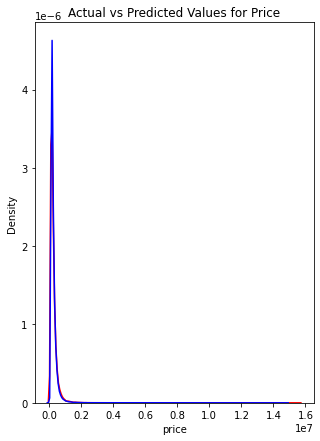

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(lgbm_y_pred_test, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Price')


plt.show()
plt.close()

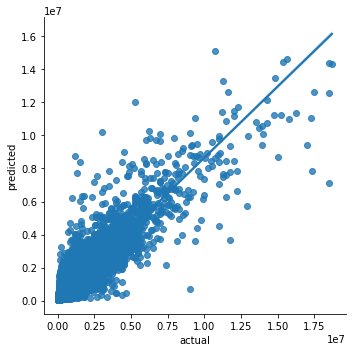

In [18]:
df5 = pd.DataFrame(data = {
    'actual':y_test, 
    'predicted':rf_y_pred_test
    })

ax = sns.lmplot(x='actual', y='predicted', data = df5)
fig= ax.figure
fig.savefig('C:/Users/METE/Pictures/MLPPD/actualpredicted_rf_last.png', format='png', dpi=1200)

In [25]:
X = df5.iloc[:, :-1].values # feature
y = df5.iloc[:, -1].values # label

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8750627493320131
Coefficient: [0.871482]
Intercept: 88084.29278768587


In [26]:
df5.to_csv('D:/İndirilenler/actual_and_predicted_cluster5.csv')

In [27]:
df5

actual     predicted
233768   500000  8.000577e+05
205362   335000  3.127777e+05
178849   710000  6.316822e+05
142060   880000  7.661272e+05
243396  3800000  5.145539e+06
...         ...           ...
11177    257000  3.090453e+05
150139   565000  5.883568e+05
250020   500000  5.015580e+05
22422    625000  4.914259e+05
218898  1200000  1.278614e+06

[55986 rows x 2 columns]

In [22]:
y_test

233768     500000
205362     335000
178849     710000
142060     880000
243396    3800000
           ...   
11177      257000
150139     565000
250020     500000
22422      625000
218898    1200000
Name: price, Length: 55986, dtype: int64

In [24]:
lgbm_y_pred_test

array([ 800057.73837197,  312777.72579252,  631682.15212716, ...,
        501557.95123206,  491425.88711428, 1278614.3926409 ])

Eksik olan yeşil alana yakınlık ekle

In [3]:
green = pd.read_csv('D:/İndirilenler/green_uprn.csv')
green

FID          UPRN  SAMPLE_1
0                1             1     100.0
1                2            26     100.0
2                3            27     100.0
3                4            30     100.0
4                5            31     100.0
...            ...           ...       ...
39706740  39706741  906700540293     100.0
39706741  39706742  906700540294     100.0
39706742  39706743  906700540295     100.0
39706743  39706744  906700540296     100.0
39706744  39706745  906700601612     100.0

[39706745 rows x 3 columns]

In [11]:
df = df.merge(green, how = 'left', left_on = 'UPRN', right_on = 'UPRN')
df = df.drop(['FID'], axis=1)
df.rename(columns={"SAMPLE_1": "green"}, inplace=True)
df

id                           transactionid   price  \
0        10000000  {5F2B8B60-B9D0-4F00-8561-8BBF0C991BE1}  187250   
1        10000002  {5F54B81D-B8BA-2B45-E053-6B04A8C01FB0}  394000   
2        10000004  {F5CB911D-B4EF-4F74-A696-1131D46A1019}  447000   
3        10000006  {47844C80-5285-8986-E050-A8C063056488}  700700   
4        10000007  {666758D7-4CCD-3363-E053-6B04A8C0D74E}  350000   
...           ...                                     ...     ...   
5626989   8063306  {708A20DC-7AB1-4A04-97F0-897BDE1DF6CB}  123000   
5626990   8063307  {35C3143F-BAC6-449A-AC6A-A48D1DB5387C}  203000   
5626991   8063307  {64342BFE-971F-422C-E053-6C04A8C0FB8A}  225000   
5626992   8063308  {7C2D0700-6C4D-4963-E053-6B04A8C07B97}  260000   
5626993   8063309  {9D2C87E5-A94E-4D23-B717-86B09509E02F}  180000   

         dateoftransfer propertytype oldnew duration  tfarea  numberrooms  \
0                  2014            F      N        L    46.0            2   
1                  2017            T      N        F    77.0            5   
2                  2013            S      N        F   139.0            5   
3                  2017            D      N        F   148.0            7   
4                  2018            F      N        L    63.0            4   
...                 ...          ...    ...      ...     ...          ...   
5626989            2014            T      N        F   140.0            6   
5626990            2015            D      N        F   108.0            5   
5626991            2018            D      N        F   108.0            5   
5626992            2018            D      N        F    83.0            5   
5626993            2012            D      N        F   198.4            6   

         ENVIRONMENT_IMPACT_CURRENT  ...  secondaryedu  slope  University  \
0                                81  ...            90     40          50   
1                                55  ...            50     70           0   
2                                70  ...            90     70          60   
3                                54  ...            80     60          50   
4                                67  ...            80     40          70   
...                             ...  ...           ...    ...         ...   
5626989                          63  ...            80     70           0   
5626990                          70  ...            10    100           0   
5626991                          70  ...            10    100           0   
5626992                          77  ...            80     70           0   
5626993                          34  ...             0     70           0   

                 UPRN  CURRENT_ENERGY_EFFICIENCY  ENERGY_CONSUMPTION_CURRENT  \
0        100062138600                         78                         147   
1        100061420595                         60                         274   
2        100061418755                         73                         137   
3        100061437199                         62                         239   
4        100062135630                         68                         228   
...               ...                        ...                         ...   
5626989   10011994837                         67                         183   
5626990  100091554289                         77                         129   
5626991  100091554289                         77                         129   
5626992  100090790148                         77                         150   
5626993  100090789885                         32                         452   

         CO2_EMISSIONS_CURRENT  LIGHTING_COST_CURRENT  HOT_WATER_COST_CURRENT  \
0                          1.2                     39                     118   
1                          3.9                    105                     109   
2                          3.9                     97                      94   
3                          6.3                     

In [12]:
df.to_csv('D:/Data/PPD_UPRN_ML_enriched3.csv')

In [ ]:
lgbm.plot.shap

In [31]:
df1.to_csv('D:/İndirilenler/df1.csv')

In [40]:
mergedDf.to_csv('D:/İndirilenler/mergedDf.csv')

In [25]:
df5 = pd.DataFrame(data = {
    'actual':y_test, 
    'predicted':lgbm_y_pred_test
    })

In [26]:
df5

actual     predicted
233768   500000  8.000577e+05
205362   335000  3.127777e+05
178849   710000  6.316822e+05
142060   880000  7.661272e+05
243396  3800000  5.145539e+06
...         ...           ...
11177    257000  3.090453e+05
150139   565000  5.883568e+05
250020   500000  5.015580e+05
22422    625000  4.914259e+05
218898  1200000  1.278614e+06

[55986 rows x 2 columns]

In [20]:
# Merge two Dataframes on index of both the dataframes
mergedDf = df5.merge(df, left_index=True, right_index=True)
mergedDf

actual      predicted        id  \
3603012   58500   41774.320000   3069637   
2536666  360000  349551.370000  16771263   
4400118  285000  275750.000000   5184912   
3092418   93000   89369.000000  18468918   
5128856   86000   75063.833333  11354031   
...         ...            ...       ...   
3321266  290000  298232.500000   2390184   
1404330  109000  118860.775000  13172564   
2469958  545500  533415.850000  16530136   
1620596   96500  131323.450000  13893248   
5605735   77000  122972.500000   8009070   

                                  transactionid   price  dateoftransfer  \
3603012  {68FEB20B-5657-38DA-E053-6C04A8C051AE}   58500            2018   
2536666  {5376B385-DDC9-34C1-E053-6B04A8C09FF6}  360000            2017   
4400118  {364A7B50-5A28-414E-AAF6-0A42BCE67A7A}  285000            2012   
3092418  {24EECCE3-BF93-4B42-A825-569BE44CFD08}   93000            2011   
5128856  {D8165165-ABFC-4ACD-9C8A-291E154DB00A}   86000            2014   
...                                         ...     ...             ...   
3321266  {2D1E4B25-F78C-FCD1-E050-A8C0630544EC}  290000            2016   
1404330  {4D5CA492-B9E8-406E-BFBE-A0245D4416DE}  109000            2014   
2469958  {2FD36066-16DF-4BF8-E050-A8C0620562B1}  545500            2016   
1620596  {2FD36066-33C1-4BF8-E050-A8C0620562B1}   96500            2016   
5605735  {25EA59F9-E6F7-4D50-E050-A8C0630562D0}   77000            2015   

        propertytype oldnew duration  tfarea  ...          UPRN  \
3603012            T      N        F   87.00  ...  100110489719   
2536666            T      N        F   59.00  ...      48050523   
4400118            D      N        F  113.00  ...   10012226048   
3092418            T      N        F   78.80  ...  100100692763   
5128856            T      N        F   71.00  ...  422000028542   
...              ...    ...      ...     ...  ...           ...   
3321266            T      N        F   82.20  ...  100080211732   
1404330            T      N        F   60.74  ...  100070438669   
2469958            F      N        L   73.35  ...  100021829046   
1620596            T      N        F   79.00  ...  100071090955   
5605735            T      N        F   42.00  ...   10034686106   

         CURRENT_ENERGY_EFFICIENCY  ENERGY_CONSUMPTION_CURRENT  \
3603012                         55                         285   
2536666                         63                         254   
4400118                         66                         183   
3092418                         64                         274   
5128856                         62                         248   
...                            ...                         ...   
3321266                         55                         361   
1404330                         70                         276   
2469958                         64                         291   
1620596                         25                         606   
5605735                         40                         497   

         CO2_EMISSIONS_CURRENT  LIGHTING_COST_CURRENT HOT_WATER_COST_CURRENT  \
3603012                    4.7                     96                     99   
2536666                    2.7                     62                    102   
4400118                    3.6                     93                     91   
3092418                    3.6                     40                    112   
5128856                    3.4                     62                    159   
...                        ...                    ...                    ...   
3321266                    5.0                     78                    148   
1404330                    2.8                     30                     98   
2469958                    3.6                     81                     94   
1620596                    8.5                     86                    208   
5605735                    3.5                     30                    291   

         green  prop

In [24]:
mergedDf = mergedDf.drop(['id','transactionid','location', 'propertytype_label', 'oldnew_label', 'duration_label', 'propertytype', 'oldnew', 'duration', 'ENVIRONMENT_IMPACT_CURRENT', 'HEATING_COST_CURRENT', 'ENERGY_CONSUMPTION_CURRENT', 'CO2_EMISSIONS_CURRENT', 'LIGHTING_COST_CURRENT', 'HOT_WATER_COST_CURRENT','Airport','Aroad','Aspect','Broad', 'Coachstation', 'Ferry', 'Firestation', 'Hospital', 'Junction', 'Mall', 'Medical', 'Park', 'Police', 'Port', 'Primaryedu', 'art', 'bus', 'citycenter', 'furteduc', 'library', 'musem', 'passferry', 'post', 'sports', 'subway', 'tourist', 'train', 'tram', 'worship', 'river', 'river', 'sea', 'secondaryedu', 'slope', 'University', 'actual', 'green', 'fid_2'], axis=1)
mergedDf

predicted   price  dateoftransfer  tfarea  numberrooms  \
3603012   41774.320000   58500            2018   87.00            4   
2536666  349551.370000  360000            2017   59.00            4   
4400118  275750.000000  285000            2012  113.00            5   
3092418   89369.000000   93000            2011   78.80            3   
5128856   75063.833333   86000            2014   71.00            4   
...                ...     ...             ...     ...          ...   
3321266  298232.500000  290000            2016   82.20            4   
1404330  118860.775000  109000            2014   60.74            3   
2469958  533415.850000  545500            2016   73.35            3   
1620596  131323.450000   96500            2016   79.00            5   
5605735  122972.500000   77000            2015   42.00            3   

         FLOOR_LEVEL  EXTENSION_COUNT   LATITUDE  LONGITUDE          UPRN  \
3603012            0                1  54.624469  -1.646992  100110489719   
2536666            0                0  51.391549  -0.185112      48050523   
4400118            0                0  50.742629  -1.790967   10012226048   
3092418            0                1  51.598547  -3.001385  100100692763   
5128856            0                0  53.512216  -2.158867  422000028542   
...              ...              ...        ...        ...           ...   
3321266            0                1  51.423067  -0.760548  100080211732   
1404330            0                0  52.456450  -1.988633  100070438669   
2469958            0                0  51.475361  -0.113833  100021829046   
1620596            0                0  52.620054  -1.966228  100071090955   
5605735            0                0  53.275307  -0.407003   10034686106   

         CURRENT_ENERGY_EFFICIENCY  
3603012                         55  
2536666                         63  
4400118                         66  
3092418                         64  
5128856                         62  
...                            ...  
3321266                         55  
1404330                         70  
2469958                         64  
1620596                         25  
5605735                         40  

[1125399 rows x 11 columns]

In [25]:
mergedDf.to_csv('D:/Data/output/cluster/rf_predicted.csv')

In [34]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from pyproj import Proj

In [41]:
uprn = gpd.read_file ("D:/Data/osopenuprn_202108_gpkg/osopenuprn_202107.gpkg")
uprn

UPRN  X_COORDINATE  Y_COORDINATE   LATITUDE  LONGITUDE  \
0                    1     358260.66     172796.50  51.452601  -2.602075   
1                   26     352967.00     181077.00  51.526633  -2.679361   
2                   27     352967.00     181077.00  51.526633  -2.679361   
3                   30     354800.00     180469.00  51.521317  -2.652862   
4                   31     354796.00     180460.00  51.521236  -2.652918   
...                ...           ...           ...        ...        ...   
39706740  906700540293     257507.05     665683.31  55.863198  -4.278396   
39706741  906700540294     257507.05     665683.31  55.863198  -4.278396   
39706742  906700540295     257507.05     665683.31  55.863198  -4.278396   
39706743  906700540296     266917.64     663795.97  55.848944  -4.127224   
39706744  906700601612     257561.00     667814.00  55.882343  -4.278656   

                               geometry  
0         POINT (358260.660 172796.500)  
1         POINT (352967.000 181077.000)  
2         POINT (352967.000 181077.000)  
3         POINT (354800.000 180469.000)  
4         POINT (354796.000 180460.000)  
...                                 ...  
39706740  POINT (257507.050 665683.310)  
39706741  POINT (257507.050 665683.310)  
39706742  POINT (257507.050 665683.310)  
39706743  POINT (266917.640 663795.970)  
39706744  POINT (257561.000 667814.000)  

[39706745 rows x 6 columns]

In [36]:
#uprn = uprn.drop(['airport','aroad','aspect','broad', 'coach', 'ferry', 'fire', 'hospital', 'junction', 'mall', 'medical', 'park', 'police', 'port', 'primaryedu', 'art', 'bus', 'citycenter', 'furtheredu', 'library', 'museum', 'passferry', 'post', 'sports', 'subway', 'tourist', 'train', 'tram', 'worship', 'river', 'river', 'sea', 'secondaryedu', 'slope', 'university'], axis=1)
#uprn

UPRN   LATITUDE  LONGITUDE                       geometry
0               1  51.452601  -2.602075  POINT (358260.660 172796.500)
1              26  51.526633  -2.679361  POINT (352967.000 181077.000)
2              27  51.526633  -2.679361  POINT (352967.000 181077.000)
3              30  51.521317  -2.652862  POINT (354800.000 180469.000)
4              31  51.521236  -2.652918  POINT (354796.000 180460.000)
...           ...        ...        ...                            ...
2959756  39204230  53.457616  -2.741397  POINT (350868.570 395905.860)
2959757  39204231  53.457603  -2.741468  POINT (350863.830 395904.490)
2959758  39204232  53.457583  -2.741535  POINT (350859.310 395902.260)
2959759  39204233  53.456619  -2.744148  POINT (350684.730 395796.850)
2959760  39204234  53.469676  -2.662277  POINT (356134.540 397195.810)

[2959761 rows x 4 columns]

In [42]:
mergedDf = mergedDf.merge(uprn, how = 'left', left_on = 'UPRN', right_on = 'UPRN')
mergedDf

predicted    price  dateoftransfer  tfarea  numberrooms  \
0      8.000577e+05   500000            2017   90.00            4   
1      3.127777e+05   335000            2011   84.58            5   
2      6.316822e+05   710000            2016   38.00            3   
3      7.661272e+05   880000            2017   90.72            5   
4      5.145539e+06  3800000            2014  285.00           12   
...             ...      ...             ...     ...          ...   
55981  3.090453e+05   257000            2016   41.00            2   
55982  5.883568e+05   565000            2011  116.28            5   
55983  5.015580e+05   500000            2012   52.00            3   
55984  4.914259e+05   625000            2016   80.00            3   
55985  1.278614e+06  1200000            2013  196.00            5   

       FLOOR_LEVEL  EXTENSION_COUNT          UPRN  CURRENT_ENERGY_EFFICIENCY  \
0                0                0  100022651443                         35   
1                0                0  100022576753                         67   
2                0                2  100022315801                         53   
3                0                0  100021825252                         68   
4                0                0  100022720079                         54   
...            ...              ...           ...                        ...   
55981            0                0     202192260                         73   
55982            0                1  100021848852                         53   
55983            2                0   10033573933                         47   
55984            0                0     202059597                         59   
55985            0                3  100022708263                         68   

       X_COORDINATE  Y_COORDINATE   LATITUDE  LONGITUDE  \
0          525281.0      173255.0  51.444438  -0.198673   
1          537806.0      188528.0  51.578778  -0.012592   
2          518978.0      176515.0  51.475095  -0.288230   
3          529682.0      174211.0  51.452040  -0.135031   
4          526855.0      183475.0  51.535936  -0.172367   
...             ...           ...        ...        ...   
55981      518221.0      183235.0  51.535651  -0.296874   
55982      530579.0      175751.0  51.465674  -0.121561   
55983      526348.0      181077.0  51.514499  -0.180533   
55984      523071.0      184801.0  51.548690  -0.226434   
55985      524842.0      174447.0  51.455248  -0.204567   

                            geometry  
0      POINT (525281.000 173255.000)  
1      POINT (537806.000 188528.000)  
2      POINT (518978.000 176515.000)  
3      POINT (529682.000 174211.000)  
4      POINT (526855.000 183475.000)  
...                              ...  
55981  POINT (518221.000 183235.000)  
55982  POINT (530579.000 175751.000)  
55983  POINT (526348.000 181077.000)  
55984  POINT (523071.000 184801.000)  
55985  POINT (524842.000 174447.000)  

[55986 rows x 14 columns]

In [46]:
#geometry = [Point(xy) for xy in zip(uprn['LATITUDE'], uprn['LONGITUDE'])]
gdf = GeoDataFrame(mergedDf, crs=27700, geometry=uprn.geometry)
gdf

predicted    price  dateoftransfer  tfarea  numberrooms  FLOOR_LEVEL  \
0  8.000577e+05   500000            2017   90.00            4            0   
1  3.127777e+05   335000            2011   84.58            5            0   
2  6.316822e+05   710000            2016   38.00            3            0   
3  7.661272e+05   880000            2017   90.72            5            0   
4  5.145539e+06  3800000            2014  285.00           12            0   

   EXTENSION_COUNT          UPRN  CURRENT_ENERGY_EFFICIENCY  X_COORDINATE  \
0                0  100022651443                         35      525281.0   
1                0  100022576753                         67      537806.0   
2                2  100022315801                         53      518978.0   
3                0  100021825252                         68      529682.0   
4                0  100022720079                         54      526855.0   

   Y_COORDINATE   LATITUDE  LONGITUDE                       geometry  
0      173255.0  51.444438  -0.198673  POINT (358260.660 172796.500)  
1      188528.0  51.578778  -0.012592  POINT (352967.000 181077.000)  
2      176515.0  51.475095  -0.288230  POINT (352967.000 181077.000)  
3      174211.0  51.452040  -0.135031  POINT (354800.000 180469.000)  
4      183475.0  51.535936  -0.172367  POINT (354796.000 180460.000)

In [18]:
gdf1 = gdf.dropna(subset=['geometry'])
gdf1.reset_index(drop=True, inplace=True)
gdf1

ilad        ilcead      mahallead adano_x parselno_x  \
0     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         10   
1     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         10   
2     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         12   
3     ISTANBUL      BAKIRKÖY         SENLIK     569         35   
4     ISTANBUL      BAKIRKÖY         SENLIK     727         44   
...        ...           ...            ...     ...        ...   
2752  ISTANBUL      BESIKTAS  RUMELI HISARI    1726        133   
2753  ISTANBUL      BESIKTAS  RUMELI HISARI    1519         69   
2754  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     128         11   
2755  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     108          1   
2756  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     118          6   

                                                nitelik   yuzolcum  \
0                                                  ARSA     920.37   
1                                                  ARSA     920.37   
2                ONBES BAGIMSIZ BÖLÜMLÜ KARGIR APARTMAN     905.00   
3           3KATLI MESKEN OLAN BETONARME BINA VE ARSASI     925.00   
4                                                 TARLA     943.35   
...                                                 ...        ...   
2752  ALTINDA BES DÜKKANI OLAN BES KATLI DOKSAN DAIR...    5407.00   
2753                                           APARTMAN     730.00   
2754                       B.A.K.HAVUZLU BINA VE ARSASI   29341.00   
2755                                               Arsa  135419.00   
2756                               B.A.K.BINA VE ARSASI   51389.00   

            mimariproj  konutbbsay                         tip  ... bbistkira  \
0     Mimari Proje Var        10.0  Kat Mulkiyeti/Kat İrtifakı  ...    5300.0   
1     Mimari Proje Var        10.0  Kat Mulkiyeti/Kat İrtifakı  ...   18000.0   
2     Mimari Proje Yok        15.0  Kat Mulkiyeti/Kat İrtifakı  ...    5000.0   
3     Mimari Proje Var         6.0  Kat Mulkiyeti/Kat İrtifakı  ...   13300.0   
4     Mimari Proje Yok         8.0  Kat Mulkiyeti/Kat İrtifakı  ...   11300.0   
...                ...         ...                         ...  ...       ...   
2752  Mimari Proje Var        89.0  Kat Mulkiyeti/Kat İrtifakı  ...   82500.0   
2753  Mimari Proje Yok         0.0                 AnaTaşınmaz  ...   30000.0   
2754  Mimari Proje Var        16.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   
2755  Mimari Proje Var        58.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   
2756  Mimari Proje Var        26.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   

     bbpazkira       emsalkaynak  emsalkaynak_other  \
0       5000.0             malik                NaN   
1      16000.0           emlakci                NaN   
2       4800.0           emlakci                NaN   
3       1300.0           emlakci                NaN   
4      11000.0               NaN                NaN   
...        ...               ...                ...   
2752   75000.0  emlakciwebsitesi                NaN   
2753   28000.0  emlakciwebsitesi                NaN   
2754       NaN  emlakciwebsitesi                NaN   
2755       NaN  emlakciwebsitesi                NaN   
2756       NaN  emlakciwebsitesi                NaN   

                                         websitesilinki  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2752  https://www.sahibinden.com/ilan/emlak-konut-sa...   
2753  https://www.sahibinden.com/ilan/emlak-konut-sa...   
2754  https://www.sahibinden.com/ilan/emlak-konut-sa...   
2755  https://www.sahibinden.com/ilan/emlak-konut-sa...   
2756  https://www.sahibinden.com/ilan/emlak-konut-sa...   

                           beyank

In [20]:
gdf1.to_file("emsal_parcel.gpkg", layer='emsal_parcel', driver="GPKG")

CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "emsal_parcel" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "emsal_parcel" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'


RuntimeError: Failed to write record: {'id': '0', 'type': 'Feature', 'properties': {'ALTBOLGE': 'BAKIRKOY-3', 'BANT': 'C', 'IlceID': 508.0, 'KatAK_HDC': 0.0, 'KatBK_HDC': 16000.0, 'KatCK_HDC': 15400.0, 'KatNK_HDC': 22000.0, 'KatZK_HDC': 18500.0, 'MahalleID': 148839.0, 'OBJECTID': 42, 'PROJEBOLGE': 'ISTANBUL_AVRUPA', 'ParselID': 12024769.0, 'Referans5': 'BAKIRKOY-3_C', 'Shape_Area': 9.84563803006e-08, 'Shape_Leng': 0.00133283979258, 'ZeminID': 20103799.0, 'adano_x': '626', 'adano_y': 626.0, 'asmakatm2': None, 'banyosayisi': 2.0, 'bbagirlikliyon': 'guney', 'bbcephesayisi': 2.0, 'bbemsalaciklama': 'BBno belirtilmemiştir.', 'bbistfiyat': 1600000.0, 'bbistkira': 5300.0, 'bbkatsayisi': 'tekkat', 'bbkonum': 'arka', 'bbmanzara': 'orman_yesilalan_parkbahce', 'bbmanzara_other': None, 'bbno': None, 'bbpazfiyat': 1450000.0, 'bbpazkira': 5000.0, 'bbtur': 'mesken', 'bbtur_other': None, 'bbyon': 'guney.dogu', 'beyankisi': 'Levent Kirman', 'binayas': '0_5', 'blokno': '18', 'bodrum1katim2': None, 'bodrum2katim2': None, 'catikatim2': None, 'donati': 'yok', 'emsalbagimsiziliski': '1', 'emsalkaynak': 'malik', 'emsalkaynak_other': None, 'globalid': 'EF2369A9-E0F2-4B46-BA44-F00B8859EC15', 'guvenlik': 'yok', 'id_object': 18113, 'il': 'ISTANBUL', 'ilad': 'ISTANBUL', 'ilce': 'BAKIRKOY', 'ilcead': 'BAKIRKÖY', 'kisiiletisim': '0533 232 71 83', 'konutbbsay': 10.0, 'mahalle': 'UMRANIYE', 'mahallead': 'ÜMRANIYE', 'mimariproj': 'Mimari Proje Var', 'mutfaksayisi': 1.0, 'nitelik': 'ARSA', 'normal1katim2': None, 'normal2katim2': None, 'normal3katim2': None, 'odasayisi': 3.0, 'otopark': 'kapali', 'parselno_x': '10', 'parselno_y': 10.0, 'projealani': 'bakirkoy_3', 'salonsayisi': 1.0, 'site': 'hayir', 'tekkatm2': 120.0, 'terasalanim2': None, 'tip': 'Kat Mulkiyeti/Kat İrtifakı', 'uniqueid': '1DCE317E-0E36-4E66-9792-23EF6B007C3C', 'websitesilinki': None, 'yapikatsayisi': 0.0, 'yuzolcum': 920.37, 'zeminid': 20103799.0, 'zeminkatm2': None}, 'geometry': {'type': 'Polygon', 'coordinates': (((28.817087967935436, 40.95863671761049), (28.816676432771203, 40.95859407985296), (28.816630085310237, 40.95861609165934), (28.816570520513153, 40.958784761307754), (28.817007318533, 40.95886739461463), (28.81701065951438, 40.958857775466015), (28.817087967935436, 40.95863671761049)),)}}

In [14]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3135 entries, 0 to 3134
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ilad                 2757 non-null   object  
 1   ilcead               2757 non-null   object  
 2   mahallead            2744 non-null   object  
 3   adano_x              2537 non-null   object  
 4   parselno_x           2757 non-null   object  
 5   nitelik              2744 non-null   object  
 6   yuzolcum             2757 non-null   float64 
 7   mimariproj           2744 non-null   object  
 8   konutbbsay           2757 non-null   float64 
 9   tip                  2744 non-null   object  
 10  PROJEBOLGE           2757 non-null   object  
 11  ALTBOLGE             2757 non-null   object  
 12  ParselID             2757 non-null   float64 
 13  ZeminID              2757 non-null   float64 
 14  MahalleID            2757 non-null   float64 
 15  IlceID       

In [12]:
#gdf = gdf.merge(df, how = 'right', left_on = ['ZeminID'], right_on = ['zeminid'])
#gdf

ilad        ilcead      mahallead adano_x parselno_x  \
0     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         10   
1     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         10   
2     ISTANBUL      BAKIRKÖY       ÜMRANIYE     626         12   
3     ISTANBUL      BAKIRKÖY         SENLIK     569         35   
4     ISTANBUL      BAKIRKÖY         SENLIK     727         44   
...        ...           ...            ...     ...        ...   
3130  ISTANBUL      BESIKTAS  RUMELI HISARI    1726        133   
3131  ISTANBUL      BESIKTAS  RUMELI HISARI    1519         69   
3132  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     128         11   
3133  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     108          1   
3134  ISTANBUL  BÜYÜKÇEKMECE        TÜRKOBA     118          6   

                                                nitelik   yuzolcum  \
0                                                  ARSA     920.37   
1                                                  ARSA     920.37   
2                ONBES BAGIMSIZ BÖLÜMLÜ KARGIR APARTMAN     905.00   
3           3KATLI MESKEN OLAN BETONARME BINA VE ARSASI     925.00   
4                                                 TARLA     943.35   
...                                                 ...        ...   
3130  ALTINDA BES DÜKKANI OLAN BES KATLI DOKSAN DAIR...    5407.00   
3131                                           APARTMAN     730.00   
3132                       B.A.K.HAVUZLU BINA VE ARSASI   29341.00   
3133                                               Arsa  135419.00   
3134                               B.A.K.BINA VE ARSASI   51389.00   

            mimariproj  konutbbsay                         tip  ... bbistkira  \
0     Mimari Proje Var        10.0  Kat Mulkiyeti/Kat İrtifakı  ...    5300.0   
1     Mimari Proje Var        10.0  Kat Mulkiyeti/Kat İrtifakı  ...   18000.0   
2     Mimari Proje Yok        15.0  Kat Mulkiyeti/Kat İrtifakı  ...    5000.0   
3     Mimari Proje Var         6.0  Kat Mulkiyeti/Kat İrtifakı  ...   13300.0   
4     Mimari Proje Yok         8.0  Kat Mulkiyeti/Kat İrtifakı  ...   11300.0   
...                ...         ...                         ...  ...       ...   
3130  Mimari Proje Var        89.0  Kat Mulkiyeti/Kat İrtifakı  ...   82500.0   
3131  Mimari Proje Yok         0.0                 AnaTaşınmaz  ...   30000.0   
3132  Mimari Proje Var        16.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   
3133  Mimari Proje Var        58.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   
3134  Mimari Proje Var        26.0  Kat Mulkiyeti/Kat İrtifakı  ...       NaN   

     bbpazkira       emsalkaynak  emsalkaynak_other  \
0       5000.0             malik                NaN   
1      16000.0           emlakci                NaN   
2       4800.0           emlakci                NaN   
3       1300.0           emlakci                NaN   
4      11000.0               NaN                NaN   
...        ...               ...                ...   
3130   75000.0  emlakciwebsitesi                NaN   
3131   28000.0  emlakciwebsitesi                NaN   
3132       NaN  emlakciwebsitesi                NaN   
3133       NaN  emlakciwebsitesi                NaN   
3134       NaN  emlakciwebsitesi                NaN   

                                         websitesilinki  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3130  https://www.sahibinden.com/ilan/emlak-konut-sa...   
3131  https://www.sahibinden.com/ilan/emlak-konut-sa...   
3132  https://www.sahibinden.com/ilan/emlak-konut-sa...   
3133  https://www.sahibinden.com/ilan/emlak-konut-sa...   
3134  https://www.sahibinden.com/ilan/emlak-konut-sa...   

                           beyank